# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [2]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
  # Load the raw CIFAR-10 data
  cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
  X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
  
  # Subsample the data
  mask = range(num_training, num_training + num_validation)
  X_val = X_train[mask]
  y_val = y_train[mask]
  mask = range(num_training)
  X_train = X_train[mask]
  y_train = y_train[mask]
  mask = range(num_test)
  X_test = X_test[mask]
  y_test = y_test[mask]

  return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [3]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

iteration 0 / 5000: loss 39.850613
iteration 100 / 5000: loss 37.482965
iteration 200 / 5000: loss 35.269937
iteration 300 / 5000: loss 33.265914
iteration 400 / 5000: loss 31.380804
iteration 500 / 5000: loss 29.681081
iteration 600 / 5000: loss 28.074251
iteration 700 / 5000: loss 26.618540
iteration 800 / 5000: loss 25.272581
iteration 900 / 5000: loss 24.012986
iteration 1000 / 5000: loss 22.859096
iteration 1100 / 5000: loss 21.784923
iteration 1200 / 5000: loss 20.812826
iteration 1300 / 5000: loss 19.905172
iteration 1400 / 5000: loss 19.059321
iteration 1500 / 5000: loss 18.285311
iteration 1600 / 5000: loss 17.565902
iteration 1700 / 5000: loss 16.916125
iteration 1800 / 5000: loss 16.312055
iteration 1900 / 5000: loss 15.747079
iteration 2000 / 5000: loss 15.222291
iteration 2100 / 5000: loss 14.750919
iteration 2200 / 5000: loss 14.309297
iteration 2300 / 5000: loss 13.894921
iteration 2400 / 5000: loss 13.517002
iteration 2500 / 5000: loss 13.174936
iteration 2600 / 5000: l

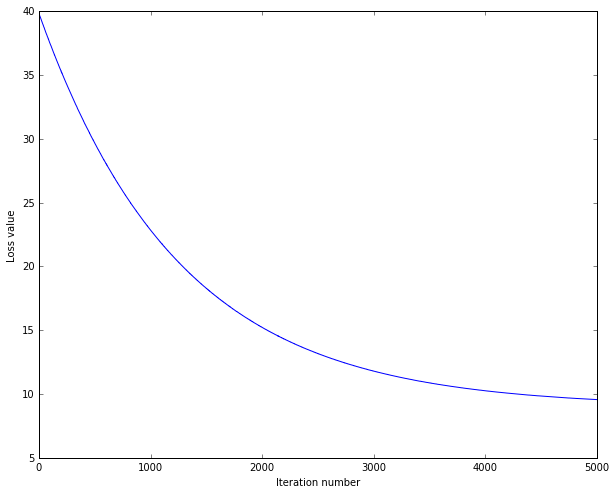

iteration 0 / 5000: loss 88.395008
iteration 100 / 5000: loss 74.007058
iteration 200 / 5000: loss 62.203724
iteration 300 / 5000: loss 52.576277
iteration 400 / 5000: loss 44.651203
iteration 500 / 5000: loss 38.188344
iteration 600 / 5000: loss 32.907137
iteration 700 / 5000: loss 28.565335
iteration 800 / 5000: loss 25.023495
iteration 900 / 5000: loss 22.112639
iteration 1000 / 5000: loss 19.738080
iteration 1100 / 5000: loss 17.782515
iteration 1200 / 5000: loss 16.194377
iteration 1300 / 5000: loss 14.888429
iteration 1400 / 5000: loss 13.824065
iteration 1500 / 5000: loss 12.946493
iteration 1600 / 5000: loss 12.232758
iteration 1700 / 5000: loss 11.644631
iteration 1800 / 5000: loss 11.165524
iteration 1900 / 5000: loss 10.773814
iteration 2000 / 5000: loss 10.450162
iteration 2100 / 5000: loss 10.186488
iteration 2200 / 5000: loss 9.972514
iteration 2300 / 5000: loss 9.796313
iteration 2400 / 5000: loss 9.651367
iteration 2500 / 5000: loss 9.533983
iteration 2600 / 5000: loss 

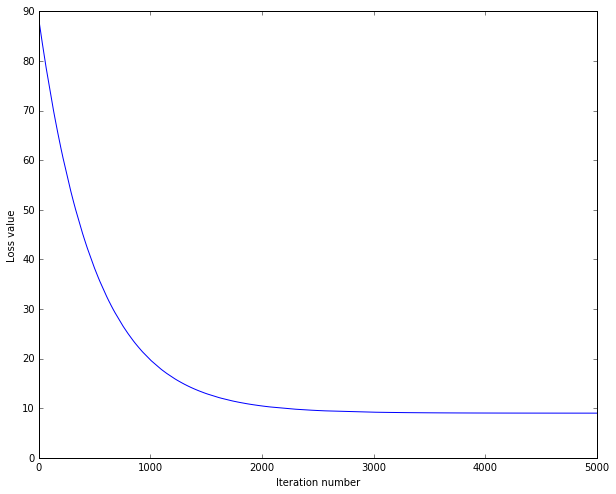

iteration 0 / 5000: loss 314.717751
iteration 100 / 5000: loss 146.144164
iteration 200 / 5000: loss 70.518677
iteration 300 / 5000: loss 36.601064
iteration 400 / 5000: loss 21.378356
iteration 500 / 5000: loss 14.555289
iteration 600 / 5000: loss 11.491525
iteration 700 / 5000: loss 10.117908
iteration 800 / 5000: loss 9.501304
iteration 900 / 5000: loss 9.224548
iteration 1000 / 5000: loss 9.100852
iteration 1100 / 5000: loss 9.045120
iteration 1200 / 5000: loss 9.020217
iteration 1300 / 5000: loss 9.009070
iteration 1400 / 5000: loss 9.004023
iteration 1500 / 5000: loss 9.001707
iteration 1600 / 5000: loss 9.000737
iteration 1700 / 5000: loss 9.000259
iteration 1800 / 5000: loss 9.000085
iteration 1900 / 5000: loss 8.999970
iteration 2000 / 5000: loss 8.999951
iteration 2100 / 5000: loss 8.999943
iteration 2200 / 5000: loss 8.999908
iteration 2300 / 5000: loss 8.999896
iteration 2400 / 5000: loss 8.999903
iteration 2500 / 5000: loss 8.999914
iteration 2600 / 5000: loss 8.999912
ite

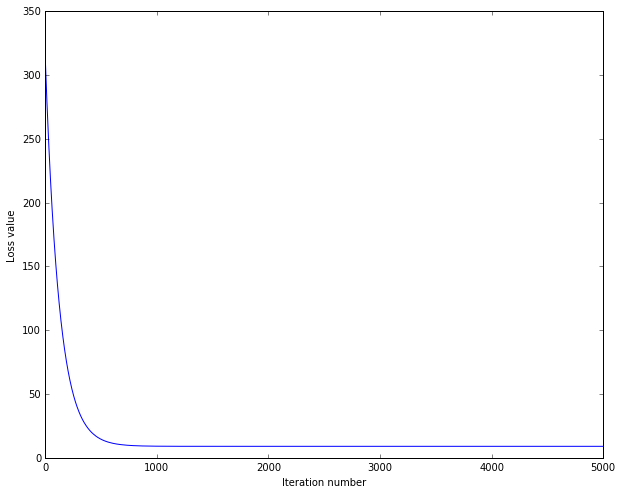

iteration 0 / 5000: loss 802.919484
iteration 100 / 5000: loss 115.370065
iteration 200 / 5000: loss 23.251066
iteration 300 / 5000: loss 10.910151
iteration 400 / 5000: loss 9.255903
iteration 500 / 5000: loss 9.034249
iteration 600 / 5000: loss 9.004575
iteration 700 / 5000: loss 9.000586
iteration 800 / 5000: loss 9.000042
iteration 900 / 5000: loss 8.999980
iteration 1000 / 5000: loss 8.999959
iteration 1100 / 5000: loss 8.999965
iteration 1200 / 5000: loss 8.999973
iteration 1300 / 5000: loss 8.999959
iteration 1400 / 5000: loss 8.999976
iteration 1500 / 5000: loss 8.999964
iteration 1600 / 5000: loss 8.999961
iteration 1700 / 5000: loss 8.999961
iteration 1800 / 5000: loss 8.999968
iteration 1900 / 5000: loss 8.999966
iteration 2000 / 5000: loss 8.999961
iteration 2100 / 5000: loss 8.999964
iteration 2200 / 5000: loss 8.999974
iteration 2300 / 5000: loss 8.999963
iteration 2400 / 5000: loss 8.999966
iteration 2500 / 5000: loss 8.999972
iteration 2600 / 5000: loss 8.999965
iterati

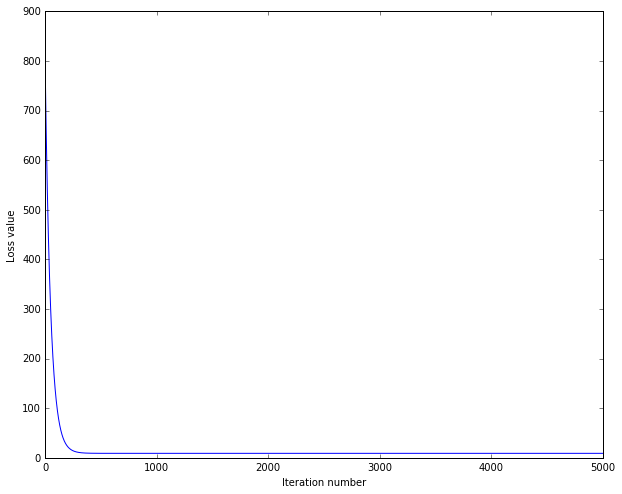

iteration 0 / 5000: loss 1654.158882
iteration 100 / 5000: loss 37.934682
iteration 200 / 5000: loss 9.508838
iteration 300 / 5000: loss 9.008940
iteration 400 / 5000: loss 9.000134
iteration 500 / 5000: loss 8.999985
iteration 600 / 5000: loss 8.999981
iteration 700 / 5000: loss 8.999982
iteration 800 / 5000: loss 8.999986
iteration 900 / 5000: loss 8.999983
iteration 1000 / 5000: loss 8.999982
iteration 1100 / 5000: loss 8.999981
iteration 1200 / 5000: loss 8.999987
iteration 1300 / 5000: loss 8.999983
iteration 1400 / 5000: loss 8.999982
iteration 1500 / 5000: loss 8.999982
iteration 1600 / 5000: loss 8.999982
iteration 1700 / 5000: loss 8.999985
iteration 1800 / 5000: loss 8.999980
iteration 1900 / 5000: loss 8.999983
iteration 2000 / 5000: loss 8.999980
iteration 2100 / 5000: loss 8.999982
iteration 2200 / 5000: loss 8.999979
iteration 2300 / 5000: loss 8.999983
iteration 2400 / 5000: loss 8.999984
iteration 2500 / 5000: loss 8.999981
iteration 2600 / 5000: loss 8.999986
iteration

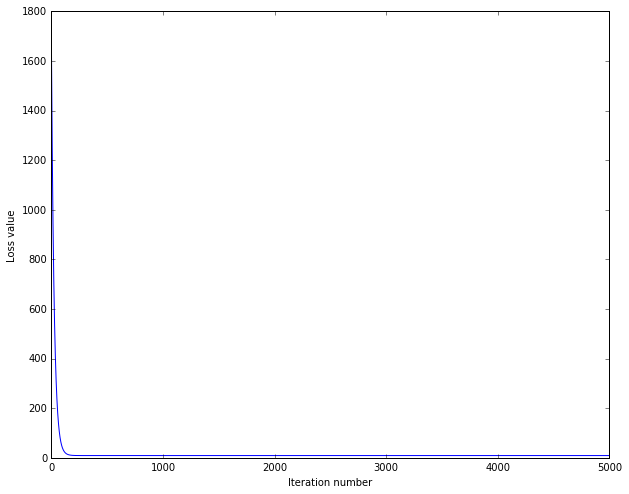

iteration 0 / 5000: loss 39.235389
iteration 100 / 5000: loss 34.772965
iteration 200 / 5000: loss 30.962486
iteration 300 / 5000: loss 27.710966
iteration 400 / 5000: loss 24.939054
iteration 500 / 5000: loss 22.574549
iteration 600 / 5000: loss 20.569322
iteration 700 / 5000: loss 18.859672
iteration 800 / 5000: loss 17.404396
iteration 900 / 5000: loss 16.164917
iteration 1000 / 5000: loss 15.100367
iteration 1100 / 5000: loss 14.194677
iteration 1200 / 5000: loss 13.425159
iteration 1300 / 5000: loss 12.769532
iteration 1400 / 5000: loss 12.215500
iteration 1500 / 5000: loss 11.737258
iteration 1600 / 5000: loss 11.332042
iteration 1700 / 5000: loss 10.985627
iteration 1800 / 5000: loss 10.693880
iteration 1900 / 5000: loss 10.447354
iteration 2000 / 5000: loss 10.229934
iteration 2100 / 5000: loss 10.049908
iteration 2200 / 5000: loss 9.894121
iteration 2300 / 5000: loss 9.761305
iteration 2400 / 5000: loss 9.646835
iteration 2500 / 5000: loss 9.551521
iteration 2600 / 5000: loss 

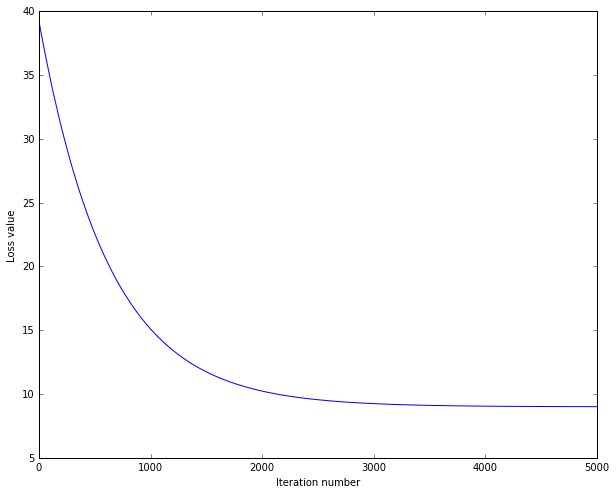

iteration 0 / 5000: loss 85.793439
iteration 100 / 5000: loss 60.459629
iteration 200 / 5000: loss 43.475052
iteration 300 / 5000: loss 32.102463
iteration 400 / 5000: loss 24.479565
iteration 500 / 5000: loss 19.366561
iteration 600 / 5000: loss 15.948950
iteration 700 / 5000: loss 13.659258
iteration 800 / 5000: loss 12.120122
iteration 900 / 5000: loss 11.088990
iteration 1000 / 5000: loss 10.399245
iteration 1100 / 5000: loss 9.938414
iteration 1200 / 5000: loss 9.627909
iteration 1300 / 5000: loss 9.421744
iteration 1400 / 5000: loss 9.282453
iteration 1500 / 5000: loss 9.188895
iteration 1600 / 5000: loss 9.126759
iteration 1700 / 5000: loss 9.084144
iteration 1800 / 5000: loss 9.056527
iteration 1900 / 5000: loss 9.037699
iteration 2000 / 5000: loss 9.025260
iteration 2100 / 5000: loss 9.016870
iteration 2200 / 5000: loss 9.011078
iteration 2300 / 5000: loss 9.007343
iteration 2400 / 5000: loss 9.004757
iteration 2500 / 5000: loss 9.003108
iteration 2600 / 5000: loss 9.002065
it

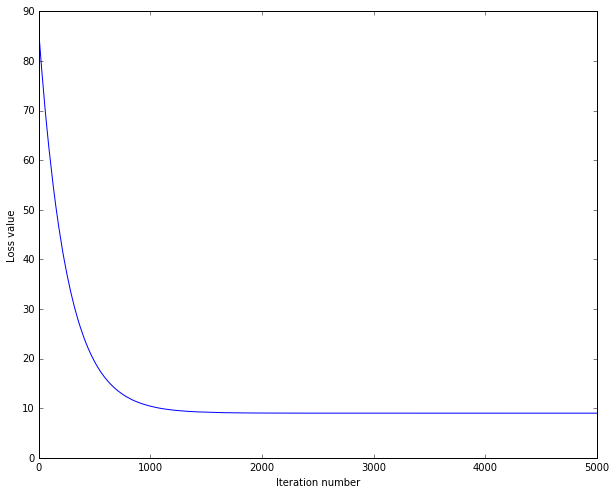

iteration 0 / 5000: loss 315.230478
iteration 100 / 5000: loss 70.435176
iteration 200 / 5000: loss 21.324684
iteration 300 / 5000: loss 11.472737
iteration 400 / 5000: loss 9.495588
iteration 500 / 5000: loss 9.099247
iteration 600 / 5000: loss 9.019815
iteration 700 / 5000: loss 9.003954
iteration 800 / 5000: loss 9.000727
iteration 900 / 5000: loss 9.000087
iteration 1000 / 5000: loss 8.999949
iteration 1100 / 5000: loss 8.999913
iteration 1200 / 5000: loss 8.999923
iteration 1300 / 5000: loss 8.999921
iteration 1400 / 5000: loss 8.999906
iteration 1500 / 5000: loss 8.999922
iteration 1600 / 5000: loss 8.999912
iteration 1700 / 5000: loss 8.999923
iteration 1800 / 5000: loss 8.999905
iteration 1900 / 5000: loss 8.999908
iteration 2000 / 5000: loss 8.999922
iteration 2100 / 5000: loss 8.999895
iteration 2200 / 5000: loss 8.999921
iteration 2300 / 5000: loss 8.999902
iteration 2400 / 5000: loss 8.999903
iteration 2500 / 5000: loss 8.999899
iteration 2600 / 5000: loss 8.999919
iteratio

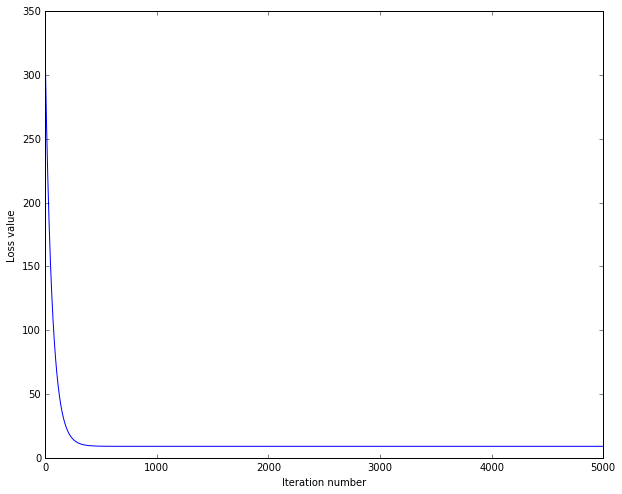

iteration 0 / 5000: loss 767.069875
iteration 100 / 5000: loss 22.333842
iteration 200 / 5000: loss 9.234256
iteration 300 / 5000: loss 9.004106
iteration 400 / 5000: loss 9.000036
iteration 500 / 5000: loss 8.999970
iteration 600 / 5000: loss 8.999956
iteration 700 / 5000: loss 8.999961
iteration 800 / 5000: loss 8.999961
iteration 900 / 5000: loss 8.999971
iteration 1000 / 5000: loss 8.999973
iteration 1100 / 5000: loss 8.999965
iteration 1200 / 5000: loss 8.999970
iteration 1300 / 5000: loss 8.999961
iteration 1400 / 5000: loss 8.999958
iteration 1500 / 5000: loss 8.999968
iteration 1600 / 5000: loss 8.999958
iteration 1700 / 5000: loss 8.999971
iteration 1800 / 5000: loss 8.999960
iteration 1900 / 5000: loss 8.999969
iteration 2000 / 5000: loss 8.999968
iteration 2100 / 5000: loss 8.999971
iteration 2200 / 5000: loss 8.999964
iteration 2300 / 5000: loss 8.999968
iteration 2400 / 5000: loss 8.999962
iteration 2500 / 5000: loss 8.999967
iteration 2600 / 5000: loss 8.999963
iteration 

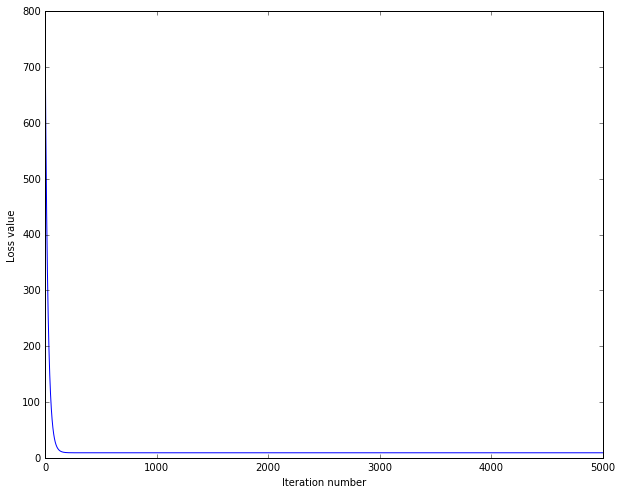

iteration 0 / 5000: loss 1676.389606
iteration 100 / 5000: loss 9.474547
iteration 200 / 5000: loss 9.000122
iteration 300 / 5000: loss 8.999986
iteration 400 / 5000: loss 8.999983
iteration 500 / 5000: loss 8.999984
iteration 600 / 5000: loss 8.999978
iteration 700 / 5000: loss 8.999979
iteration 800 / 5000: loss 8.999985
iteration 900 / 5000: loss 8.999984
iteration 1000 / 5000: loss 8.999986
iteration 1100 / 5000: loss 8.999984
iteration 1200 / 5000: loss 8.999983
iteration 1300 / 5000: loss 8.999984
iteration 1400 / 5000: loss 8.999990
iteration 1500 / 5000: loss 8.999984
iteration 1600 / 5000: loss 8.999980
iteration 1700 / 5000: loss 8.999978
iteration 1800 / 5000: loss 8.999981
iteration 1900 / 5000: loss 8.999983
iteration 2000 / 5000: loss 8.999985
iteration 2100 / 5000: loss 8.999984
iteration 2200 / 5000: loss 8.999985
iteration 2300 / 5000: loss 8.999985
iteration 2400 / 5000: loss 8.999984
iteration 2500 / 5000: loss 8.999982
iteration 2600 / 5000: loss 8.999982
iteration 

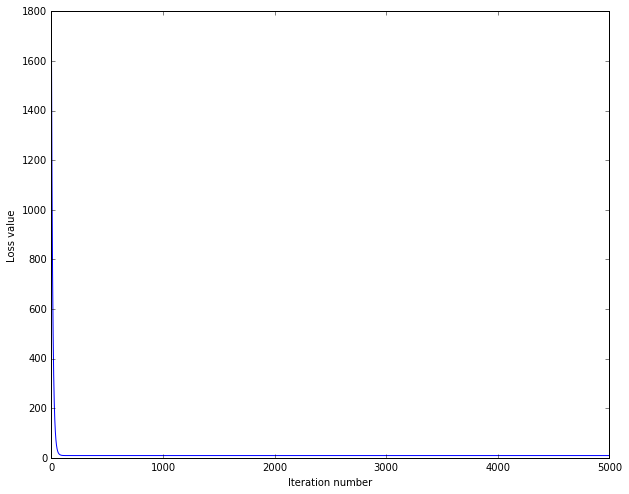

iteration 0 / 5000: loss 39.736195
iteration 100 / 5000: loss 31.320165
iteration 200 / 5000: loss 25.203300
iteration 300 / 5000: loss 20.769231
iteration 400 / 5000: loss 17.535464
iteration 500 / 5000: loss 15.198047
iteration 600 / 5000: loss 13.499313
iteration 700 / 5000: loss 12.265627
iteration 800 / 5000: loss 11.370141
iteration 900 / 5000: loss 10.722417
iteration 1000 / 5000: loss 10.246396
iteration 1100 / 5000: loss 9.904494
iteration 1200 / 5000: loss 9.658424
iteration 1300 / 5000: loss 9.476493
iteration 1400 / 5000: loss 9.346372
iteration 1500 / 5000: loss 9.252745
iteration 1600 / 5000: loss 9.182819
iteration 1700 / 5000: loss 9.131259
iteration 1800 / 5000: loss 9.096285
iteration 1900 / 5000: loss 9.069159
iteration 2000 / 5000: loss 9.050240
iteration 2100 / 5000: loss 9.035893
iteration 2200 / 5000: loss 9.025874
iteration 2300 / 5000: loss 9.018631
iteration 2400 / 5000: loss 9.013540
iteration 2500 / 5000: loss 9.009491
iteration 2600 / 5000: loss 9.006770
it

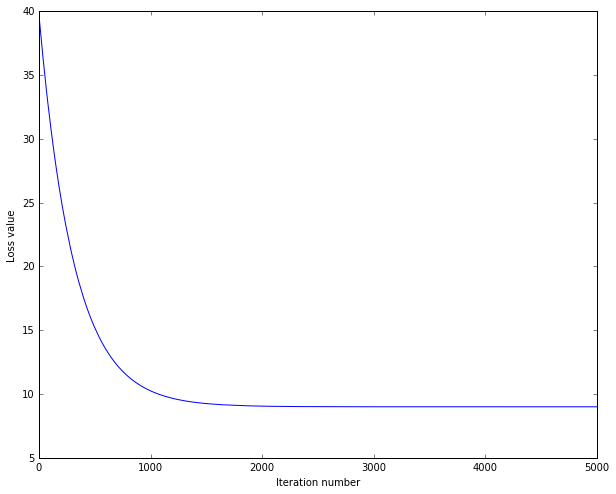

iteration 0 / 5000: loss 83.251474
iteration 100 / 5000: loss 42.312184
iteration 200 / 5000: loss 23.939833
iteration 300 / 5000: loss 15.709339
iteration 400 / 5000: loss 12.004428
iteration 500 / 5000: loss 10.348881
iteration 600 / 5000: loss 9.605539
iteration 700 / 5000: loss 9.270343
iteration 800 / 5000: loss 9.121757
iteration 900 / 5000: loss 9.054048
iteration 1000 / 5000: loss 9.024461
iteration 1100 / 5000: loss 9.010747
iteration 1200 / 5000: loss 9.004498
iteration 1300 / 5000: loss 9.001888
iteration 1400 / 5000: loss 9.000622
iteration 1500 / 5000: loss 9.000009
iteration 1600 / 5000: loss 8.999880
iteration 1700 / 5000: loss 8.999786
iteration 1800 / 5000: loss 8.999673
iteration 1900 / 5000: loss 8.999691
iteration 2000 / 5000: loss 8.999600
iteration 2100 / 5000: loss 8.999710
iteration 2200 / 5000: loss 8.999717
iteration 2300 / 5000: loss 8.999624
iteration 2400 / 5000: loss 8.999657
iteration 2500 / 5000: loss 8.999617
iteration 2600 / 5000: loss 8.999511
iterati

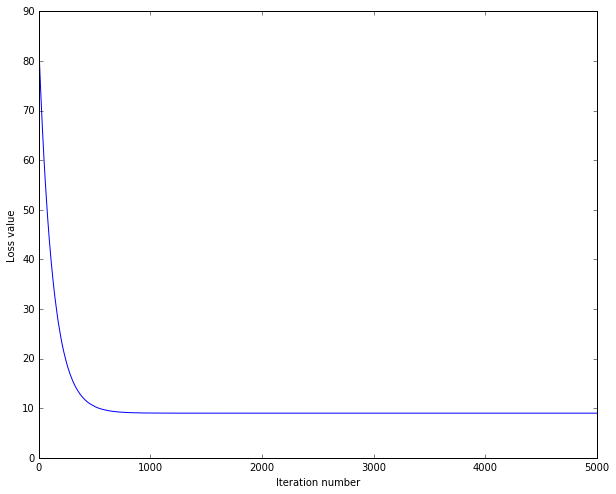

iteration 0 / 5000: loss 333.502038
iteration 100 / 5000: loss 21.890021
iteration 200 / 5000: loss 9.511649
iteration 300 / 5000: loss 9.020182
iteration 400 / 5000: loss 9.000710
iteration 500 / 5000: loss 8.999936
iteration 600 / 5000: loss 8.999914
iteration 700 / 5000: loss 8.999894
iteration 800 / 5000: loss 8.999897
iteration 900 / 5000: loss 8.999920
iteration 1000 / 5000: loss 8.999910
iteration 1100 / 5000: loss 8.999895
iteration 1200 / 5000: loss 8.999921
iteration 1300 / 5000: loss 8.999901
iteration 1400 / 5000: loss 8.999913
iteration 1500 / 5000: loss 8.999898
iteration 1600 / 5000: loss 8.999898
iteration 1700 / 5000: loss 8.999903
iteration 1800 / 5000: loss 8.999905
iteration 1900 / 5000: loss 8.999912
iteration 2000 / 5000: loss 8.999921
iteration 2100 / 5000: loss 8.999901
iteration 2200 / 5000: loss 8.999895
iteration 2300 / 5000: loss 8.999923
iteration 2400 / 5000: loss 8.999932
iteration 2500 / 5000: loss 8.999921
iteration 2600 / 5000: loss 8.999903
iteration 

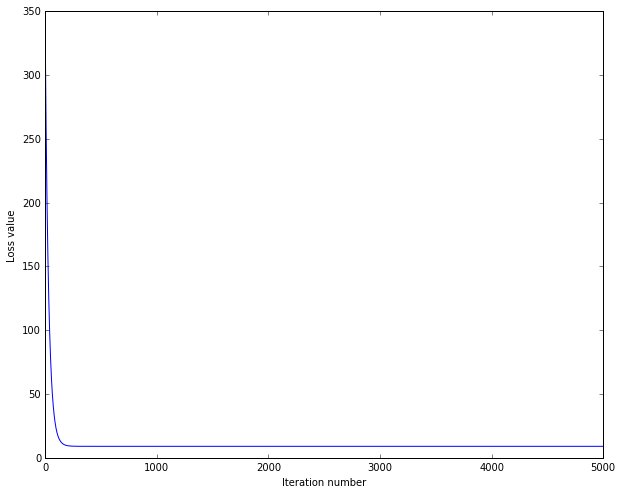

iteration 0 / 5000: loss 845.270053
iteration 100 / 5000: loss 9.238061
iteration 200 / 5000: loss 9.000037
iteration 300 / 5000: loss 8.999963
iteration 400 / 5000: loss 8.999972
iteration 500 / 5000: loss 8.999960
iteration 600 / 5000: loss 8.999965
iteration 700 / 5000: loss 8.999960
iteration 800 / 5000: loss 8.999968
iteration 900 / 5000: loss 8.999963
iteration 1000 / 5000: loss 8.999964
iteration 1100 / 5000: loss 8.999956
iteration 1200 / 5000: loss 8.999973
iteration 1300 / 5000: loss 8.999966
iteration 1400 / 5000: loss 8.999967
iteration 1500 / 5000: loss 8.999966
iteration 1600 / 5000: loss 8.999963
iteration 1700 / 5000: loss 8.999960
iteration 1800 / 5000: loss 8.999967
iteration 1900 / 5000: loss 8.999965
iteration 2000 / 5000: loss 8.999958
iteration 2100 / 5000: loss 8.999970
iteration 2200 / 5000: loss 8.999972
iteration 2300 / 5000: loss 8.999965
iteration 2400 / 5000: loss 8.999962
iteration 2500 / 5000: loss 8.999965
iteration 2600 / 5000: loss 8.999970
iteration 2

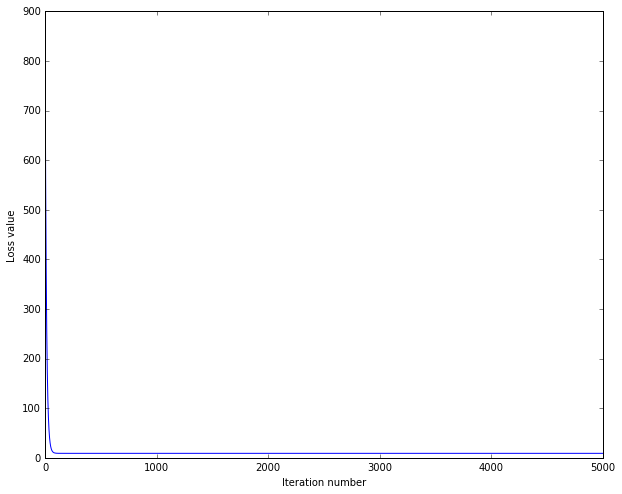

iteration 0 / 5000: loss 1478.304705
iteration 100 / 5000: loss 9.000063
iteration 200 / 5000: loss 8.999986
iteration 300 / 5000: loss 8.999985
iteration 400 / 5000: loss 8.999984
iteration 500 / 5000: loss 8.999981
iteration 600 / 5000: loss 8.999989
iteration 700 / 5000: loss 8.999982
iteration 800 / 5000: loss 8.999984
iteration 900 / 5000: loss 8.999984
iteration 1000 / 5000: loss 8.999980
iteration 1100 / 5000: loss 8.999988
iteration 1200 / 5000: loss 8.999981
iteration 1300 / 5000: loss 8.999980
iteration 1400 / 5000: loss 8.999985
iteration 1500 / 5000: loss 8.999980
iteration 1600 / 5000: loss 8.999982
iteration 1700 / 5000: loss 8.999983
iteration 1800 / 5000: loss 8.999980
iteration 1900 / 5000: loss 8.999983
iteration 2000 / 5000: loss 8.999984
iteration 2100 / 5000: loss 8.999983
iteration 2200 / 5000: loss 8.999981
iteration 2300 / 5000: loss 8.999979
iteration 2400 / 5000: loss 8.999986
iteration 2500 / 5000: loss 8.999978
iteration 2600 / 5000: loss 8.999986
iteration 

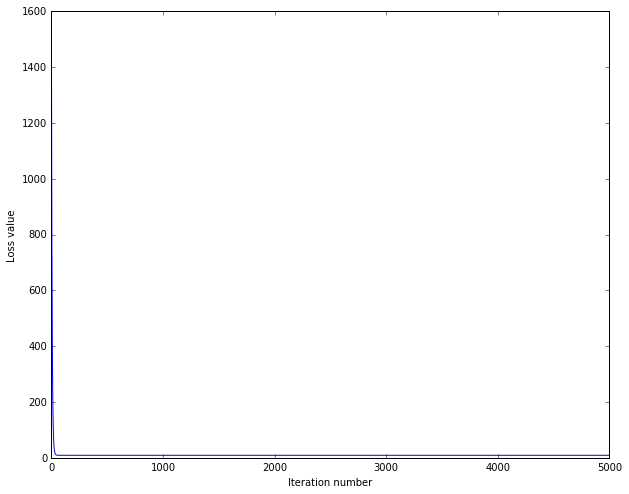

iteration 0 / 5000: loss 39.317892
iteration 100 / 5000: loss 22.588457
iteration 200 / 5000: loss 15.096301
iteration 300 / 5000: loss 11.733485
iteration 400 / 5000: loss 10.226888
iteration 500 / 5000: loss 9.548564
iteration 600 / 5000: loss 9.246363
iteration 700 / 5000: loss 9.109303
iteration 800 / 5000: loss 9.048614
iteration 900 / 5000: loss 9.021198
iteration 1000 / 5000: loss 9.009406
iteration 1100 / 5000: loss 9.003710
iteration 1200 / 5000: loss 9.001347
iteration 1300 / 5000: loss 8.999964
iteration 1400 / 5000: loss 8.999342
iteration 1500 / 5000: loss 8.999194
iteration 1600 / 5000: loss 8.999330
iteration 1700 / 5000: loss 8.999107
iteration 1800 / 5000: loss 8.999232
iteration 1900 / 5000: loss 8.999105
iteration 2000 / 5000: loss 8.999100
iteration 2100 / 5000: loss 8.999115
iteration 2200 / 5000: loss 8.999180
iteration 2300 / 5000: loss 8.999096
iteration 2400 / 5000: loss 8.999119
iteration 2500 / 5000: loss 8.999033
iteration 2600 / 5000: loss 8.998972
iteratio

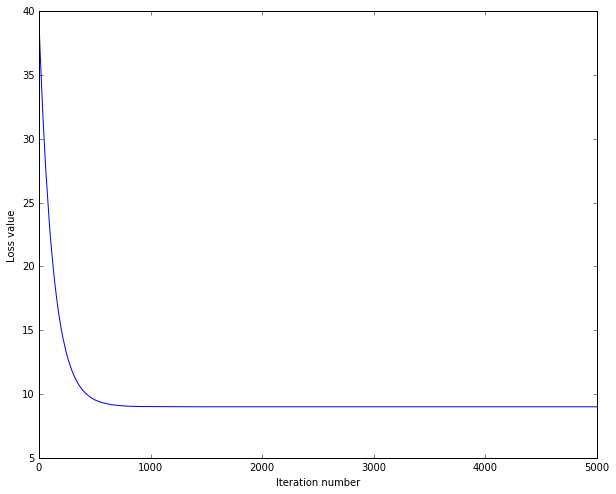

iteration 0 / 5000: loss 85.301304
iteration 100 / 5000: loss 19.226069
iteration 200 / 5000: loss 10.370389
iteration 300 / 5000: loss 9.183110
iteration 400 / 5000: loss 9.024220
iteration 500 / 5000: loss 9.002979
iteration 600 / 5000: loss 9.000075
iteration 700 / 5000: loss 8.999731
iteration 800 / 5000: loss 8.999612
iteration 900 / 5000: loss 8.999663
iteration 1000 / 5000: loss 8.999639
iteration 1100 / 5000: loss 8.999642
iteration 1200 / 5000: loss 8.999594
iteration 1300 / 5000: loss 8.999671
iteration 1400 / 5000: loss 8.999610
iteration 1500 / 5000: loss 8.999634
iteration 1600 / 5000: loss 8.999644
iteration 1700 / 5000: loss 8.999692
iteration 1800 / 5000: loss 8.999658
iteration 1900 / 5000: loss 8.999674
iteration 2000 / 5000: loss 8.999731
iteration 2100 / 5000: loss 8.999629
iteration 2200 / 5000: loss 8.999599
iteration 2300 / 5000: loss 8.999652
iteration 2400 / 5000: loss 8.999689
iteration 2500 / 5000: loss 8.999728
iteration 2600 / 5000: loss 8.999648
iteration 

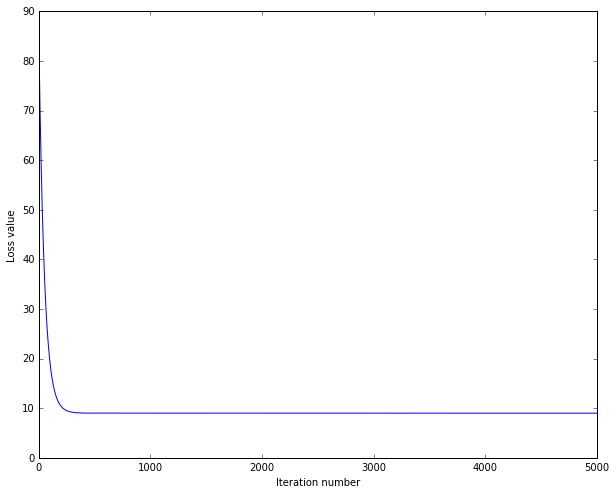

iteration 0 / 5000: loss 312.036806
iteration 100 / 5000: loss 9.086429
iteration 200 / 5000: loss 8.999966
iteration 300 / 5000: loss 8.999904
iteration 400 / 5000: loss 8.999923
iteration 500 / 5000: loss 8.999908
iteration 600 / 5000: loss 8.999919
iteration 700 / 5000: loss 8.999915
iteration 800 / 5000: loss 8.999892
iteration 900 / 5000: loss 8.999896
iteration 1000 / 5000: loss 8.999920
iteration 1100 / 5000: loss 8.999911
iteration 1200 / 5000: loss 8.999909
iteration 1300 / 5000: loss 8.999913
iteration 1400 / 5000: loss 8.999898
iteration 1500 / 5000: loss 8.999913
iteration 1600 / 5000: loss 8.999910
iteration 1700 / 5000: loss 8.999919
iteration 1800 / 5000: loss 8.999914
iteration 1900 / 5000: loss 8.999887
iteration 2000 / 5000: loss 8.999936
iteration 2100 / 5000: loss 8.999913
iteration 2200 / 5000: loss 8.999946
iteration 2300 / 5000: loss 8.999919
iteration 2400 / 5000: loss 8.999919
iteration 2500 / 5000: loss 8.999904
iteration 2600 / 5000: loss 8.999907
iteration 2

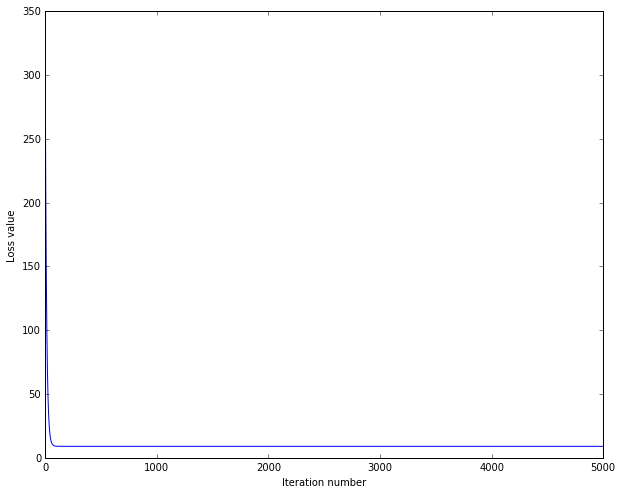

iteration 0 / 5000: loss 817.074848
iteration 100 / 5000: loss 8.999961
iteration 200 / 5000: loss 8.999970
iteration 300 / 5000: loss 8.999969
iteration 400 / 5000: loss 8.999968
iteration 500 / 5000: loss 8.999972
iteration 600 / 5000: loss 8.999960
iteration 700 / 5000: loss 8.999965
iteration 800 / 5000: loss 8.999973
iteration 900 / 5000: loss 8.999962
iteration 1000 / 5000: loss 8.999968
iteration 1100 / 5000: loss 8.999963
iteration 1200 / 5000: loss 8.999965
iteration 1300 / 5000: loss 8.999964
iteration 1400 / 5000: loss 8.999971
iteration 1500 / 5000: loss 8.999960
iteration 1600 / 5000: loss 8.999965
iteration 1700 / 5000: loss 8.999970
iteration 1800 / 5000: loss 8.999960
iteration 1900 / 5000: loss 8.999965
iteration 2000 / 5000: loss 8.999971
iteration 2100 / 5000: loss 8.999964
iteration 2200 / 5000: loss 8.999974
iteration 2300 / 5000: loss 8.999969
iteration 2400 / 5000: loss 8.999971
iteration 2500 / 5000: loss 8.999967
iteration 2600 / 5000: loss 8.999973
iteration 2

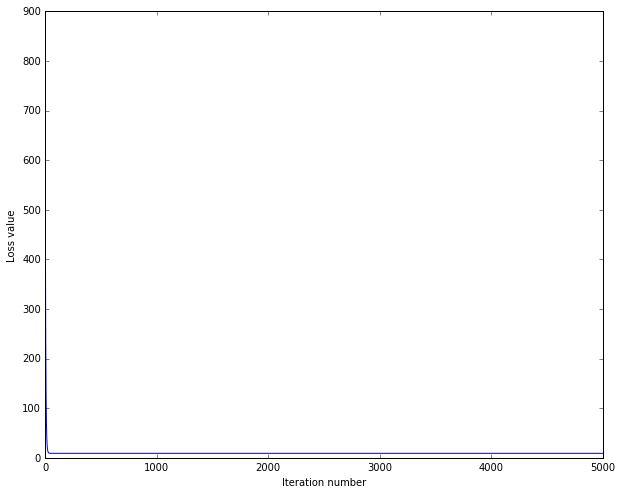

iteration 0 / 5000: loss 1549.182520
iteration 100 / 5000: loss 8.999984
iteration 200 / 5000: loss 8.999983
iteration 300 / 5000: loss 8.999978
iteration 400 / 5000: loss 8.999982
iteration 500 / 5000: loss 8.999986
iteration 600 / 5000: loss 8.999978
iteration 700 / 5000: loss 8.999984
iteration 800 / 5000: loss 8.999985
iteration 900 / 5000: loss 8.999981
iteration 1000 / 5000: loss 8.999984
iteration 1100 / 5000: loss 8.999980
iteration 1200 / 5000: loss 8.999985
iteration 1300 / 5000: loss 8.999982
iteration 1400 / 5000: loss 8.999983
iteration 1500 / 5000: loss 8.999986
iteration 1600 / 5000: loss 8.999980
iteration 1700 / 5000: loss 8.999984
iteration 1800 / 5000: loss 8.999987
iteration 1900 / 5000: loss 8.999986
iteration 2000 / 5000: loss 8.999983
iteration 2100 / 5000: loss 8.999984
iteration 2200 / 5000: loss 8.999983
iteration 2300 / 5000: loss 8.999984
iteration 2400 / 5000: loss 8.999980
iteration 2500 / 5000: loss 8.999984
iteration 2600 / 5000: loss 8.999984
iteration 

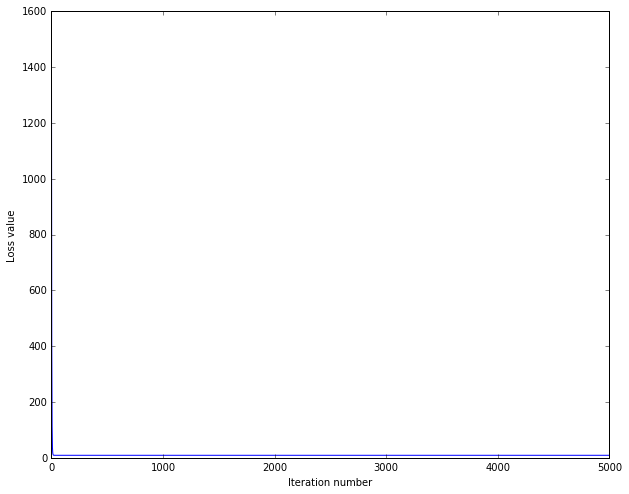

iteration 0 / 5000: loss 39.944563
iteration 100 / 5000: loss 15.211358
iteration 200 / 5000: loss 10.242992
iteration 300 / 5000: loss 9.251158
iteration 400 / 5000: loss 9.049138
iteration 500 / 5000: loss 9.008936
iteration 600 / 5000: loss 9.001289
iteration 700 / 5000: loss 8.999505
iteration 800 / 5000: loss 8.999332
iteration 900 / 5000: loss 8.999133
iteration 1000 / 5000: loss 8.999405
iteration 1100 / 5000: loss 8.999073
iteration 1200 / 5000: loss 8.999149
iteration 1300 / 5000: loss 8.999134
iteration 1400 / 5000: loss 8.999327
iteration 1500 / 5000: loss 8.999009
iteration 1600 / 5000: loss 8.999138
iteration 1700 / 5000: loss 8.999073
iteration 1800 / 5000: loss 8.999210
iteration 1900 / 5000: loss 8.999087
iteration 2000 / 5000: loss 8.999116
iteration 2100 / 5000: loss 8.999092
iteration 2200 / 5000: loss 8.998937
iteration 2300 / 5000: loss 8.998968
iteration 2400 / 5000: loss 8.999090
iteration 2500 / 5000: loss 8.999131
iteration 2600 / 5000: loss 8.999016
iteration 

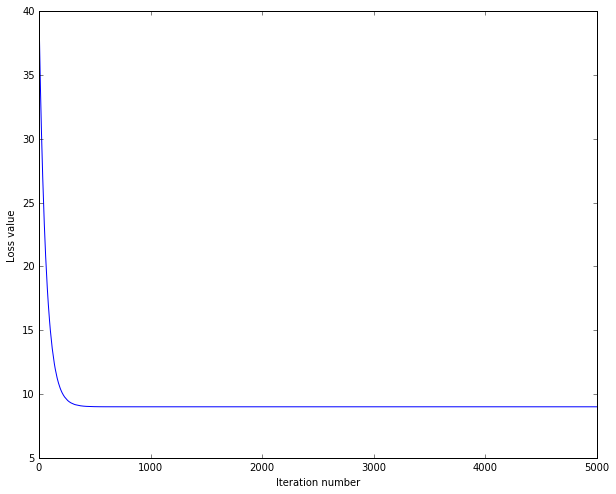

iteration 0 / 5000: loss 85.021793
iteration 100 / 5000: loss 10.336534
iteration 200 / 5000: loss 9.022994
iteration 300 / 5000: loss 9.000012
iteration 400 / 5000: loss 8.999628
iteration 500 / 5000: loss 8.999678
iteration 600 / 5000: loss 8.999721
iteration 700 / 5000: loss 8.999617
iteration 800 / 5000: loss 8.999584
iteration 900 / 5000: loss 8.999560
iteration 1000 / 5000: loss 8.999662
iteration 1100 / 5000: loss 8.999556
iteration 1200 / 5000: loss 8.999623
iteration 1300 / 5000: loss 8.999665
iteration 1400 / 5000: loss 8.999737
iteration 1500 / 5000: loss 8.999609
iteration 1600 / 5000: loss 8.999631
iteration 1700 / 5000: loss 8.999625
iteration 1800 / 5000: loss 8.999645
iteration 1900 / 5000: loss 8.999688
iteration 2000 / 5000: loss 8.999724
iteration 2100 / 5000: loss 8.999617
iteration 2200 / 5000: loss 8.999662
iteration 2300 / 5000: loss 8.999641
iteration 2400 / 5000: loss 8.999619
iteration 2500 / 5000: loss 8.999601
iteration 2600 / 5000: loss 8.999699
iteration 2

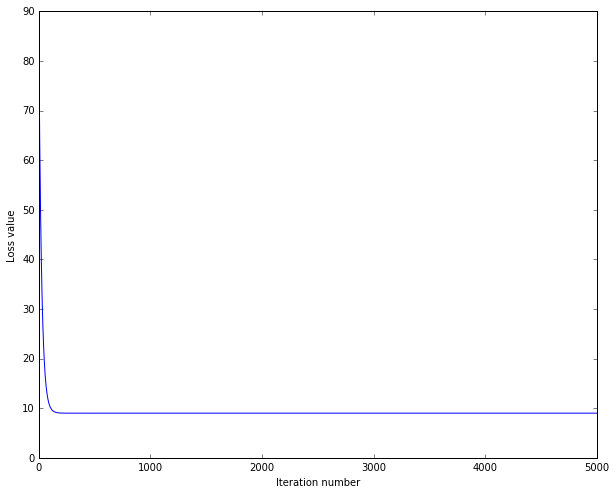

iteration 0 / 5000: loss 284.567609
iteration 100 / 5000: loss 8.999937
iteration 200 / 5000: loss 8.999927
iteration 300 / 5000: loss 8.999905
iteration 400 / 5000: loss 8.999909
iteration 500 / 5000: loss 8.999918
iteration 600 / 5000: loss 8.999913
iteration 700 / 5000: loss 8.999927
iteration 800 / 5000: loss 8.999912
iteration 900 / 5000: loss 8.999907
iteration 1000 / 5000: loss 8.999907
iteration 1100 / 5000: loss 8.999928
iteration 1200 / 5000: loss 8.999901
iteration 1300 / 5000: loss 8.999903
iteration 1400 / 5000: loss 8.999921
iteration 1500 / 5000: loss 8.999916
iteration 1600 / 5000: loss 8.999924
iteration 1700 / 5000: loss 8.999913
iteration 1800 / 5000: loss 8.999894
iteration 1900 / 5000: loss 8.999914
iteration 2000 / 5000: loss 8.999917
iteration 2100 / 5000: loss 8.999920
iteration 2200 / 5000: loss 8.999911
iteration 2300 / 5000: loss 8.999945
iteration 2400 / 5000: loss 8.999887
iteration 2500 / 5000: loss 8.999910
iteration 2600 / 5000: loss 8.999907
iteration 2

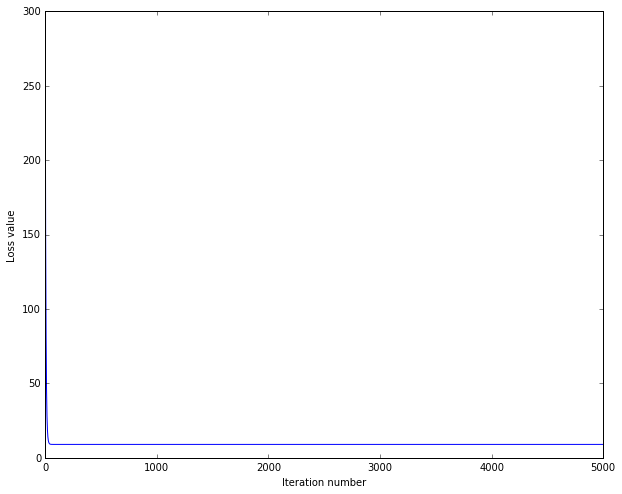

iteration 0 / 5000: loss 765.987337
iteration 100 / 5000: loss 8.999971
iteration 200 / 5000: loss 8.999972
iteration 300 / 5000: loss 8.999964
iteration 400 / 5000: loss 8.999965
iteration 500 / 5000: loss 8.999970
iteration 600 / 5000: loss 8.999973
iteration 700 / 5000: loss 8.999973
iteration 800 / 5000: loss 8.999964
iteration 900 / 5000: loss 8.999968
iteration 1000 / 5000: loss 8.999964
iteration 1100 / 5000: loss 8.999970
iteration 1200 / 5000: loss 8.999970
iteration 1300 / 5000: loss 8.999967
iteration 1400 / 5000: loss 8.999965
iteration 1500 / 5000: loss 8.999970
iteration 1600 / 5000: loss 8.999963
iteration 1700 / 5000: loss 8.999973
iteration 1800 / 5000: loss 8.999967
iteration 1900 / 5000: loss 8.999962
iteration 2000 / 5000: loss 8.999964
iteration 2100 / 5000: loss 8.999973
iteration 2200 / 5000: loss 8.999968
iteration 2300 / 5000: loss 8.999972
iteration 2400 / 5000: loss 8.999968
iteration 2500 / 5000: loss 8.999959
iteration 2600 / 5000: loss 8.999970
iteration 2

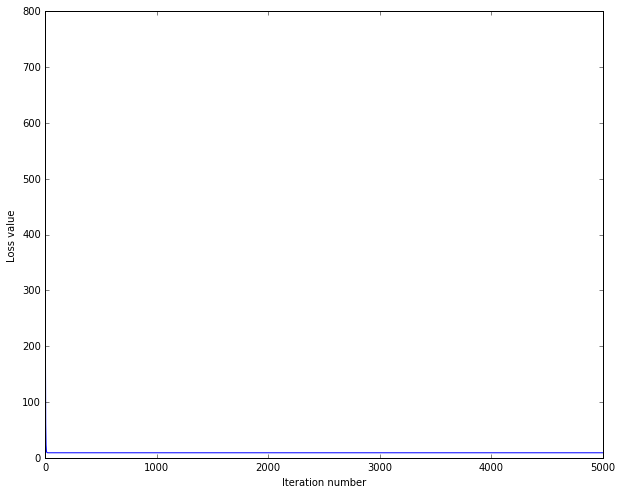

iteration 0 / 5000: loss 1616.993513
iteration 100 / 5000: loss 8.999990
iteration 200 / 5000: loss 8.999989
iteration 300 / 5000: loss 8.999990
iteration 400 / 5000: loss 8.999988
iteration 500 / 5000: loss 8.999985
iteration 600 / 5000: loss 8.999986
iteration 700 / 5000: loss 8.999988
iteration 800 / 5000: loss 8.999987
iteration 900 / 5000: loss 8.999982
iteration 1000 / 5000: loss 8.999989
iteration 1100 / 5000: loss 8.999988
iteration 1200 / 5000: loss 8.999991
iteration 1300 / 5000: loss 8.999985
iteration 1400 / 5000: loss 8.999987
iteration 1500 / 5000: loss 8.999991
iteration 1600 / 5000: loss 8.999986
iteration 1700 / 5000: loss 8.999986
iteration 1800 / 5000: loss 8.999982
iteration 1900 / 5000: loss 8.999988
iteration 2000 / 5000: loss 8.999987
iteration 2100 / 5000: loss 8.999988
iteration 2200 / 5000: loss 8.999989
iteration 2300 / 5000: loss 8.999981
iteration 2400 / 5000: loss 8.999987
iteration 2500 / 5000: loss 8.999985
iteration 2600 / 5000: loss 8.999986
iteration 

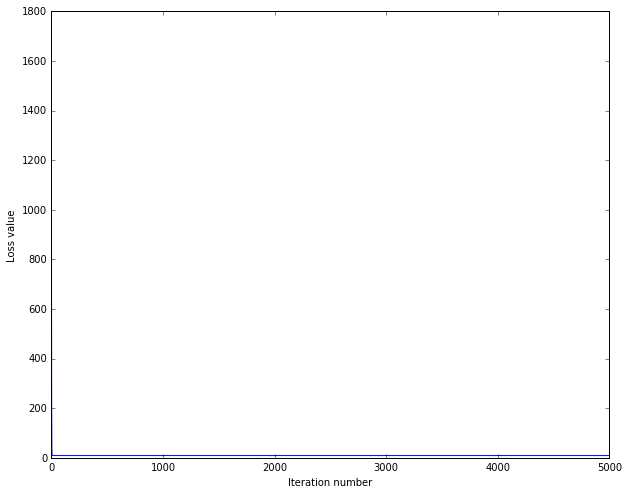

lr 1.000000e-08 reg 4.000000e+04 train accuracy: 0.129388 val accuracy: 0.131000
lr 1.000000e-08 reg 1.000000e+05 train accuracy: 0.239551 val accuracy: 0.250000
lr 1.000000e-08 reg 4.000000e+05 train accuracy: 0.416755 val accuracy: 0.425000
lr 1.000000e-08 reg 1.000000e+06 train accuracy: 0.414714 val accuracy: 0.421000
lr 1.000000e-08 reg 2.000000e+06 train accuracy: 0.413878 val accuracy: 0.410000
lr 2.000000e-08 reg 4.000000e+04 train accuracy: 0.228224 val accuracy: 0.248000
lr 2.000000e-08 reg 1.000000e+05 train accuracy: 0.412898 val accuracy: 0.410000
lr 2.000000e-08 reg 4.000000e+05 train accuracy: 0.411571 val accuracy: 0.417000
lr 2.000000e-08 reg 1.000000e+06 train accuracy: 0.411041 val accuracy: 0.408000
lr 2.000000e-08 reg 2.000000e+06 train accuracy: 0.406347 val accuracy: 0.414000
lr 4.000000e-08 reg 4.000000e+04 train accuracy: 0.415265 val accuracy: 0.424000
lr 4.000000e-08 reg 1.000000e+05 train accuracy: 0.414837 val accuracy: 0.425000
lr 4.000000e-08 reg 4.000000

In [11]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-8, 2e-8, 4e-8, 1e-7, 2e-7]
regularization_strengths = [4e4, 1e5, 4e5, 1e6, 2e6]

results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
svm = LinearSVM()
for lr in learning_rates:
    for reg in regularization_strengths:
        svm = LinearSVM()
        loss_hist = svm.train(X_train_feats, y_train, learning_rate=lr, reg=reg,
                      num_iters=5000, verbose=True)
        y_train_pred = svm.predict(X_train_feats)
        train_accuracy = np.mean(y_train == y_train_pred)
        y_val_pred = svm.predict(X_val_feats)
        val_accuracy = np.mean(y_val == y_val_pred)
        results[(lr, reg)] = (train_accuracy, val_accuracy)
        if val_accuracy > best_val:
            print 'Validation Accuracy: {}'.format(val_accuracy)
            best_val = val_accuracy
            best_svm = svm
        plt.plot(loss_hist)
        plt.xlabel('Iteration number')
        plt.ylabel('Loss value')
        plt.show()
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print 'lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy)
    
print 'best validation accuracy achieved during cross-validation: %f' % best_val

iteration 0 / 5000: loss 3029.888103
iteration 100 / 5000: loss 1364.204841
iteration 200 / 5000: loss 616.956442
iteration 300 / 5000: loss 281.729826
iteration 400 / 5000: loss 131.353094
iteration 500 / 5000: loss 63.886862
iteration 600 / 5000: loss 33.621486
iteration 700 / 5000: loss 20.045697
iteration 800 / 5000: loss 13.955288
iteration 900 / 5000: loss 11.223224
iteration 1000 / 5000: loss 9.997179
iteration 1100 / 5000: loss 9.447394
iteration 1200 / 5000: loss 9.200747
iteration 1300 / 5000: loss 9.090027
iteration 1400 / 5000: loss 9.040355
iteration 1500 / 5000: loss 9.018125
iteration 1600 / 5000: loss 9.008140
iteration 1700 / 5000: loss 9.003643
iteration 1800 / 5000: loss 9.001637
iteration 1900 / 5000: loss 9.000728
iteration 2000 / 5000: loss 9.000317
iteration 2100 / 5000: loss 9.000141
iteration 2200 / 5000: loss 9.000056
iteration 2300 / 5000: loss 9.000022
iteration 2400 / 5000: loss 9.000002
iteration 2500 / 5000: loss 8.999999
iteration 2600 / 5000: loss 8.999

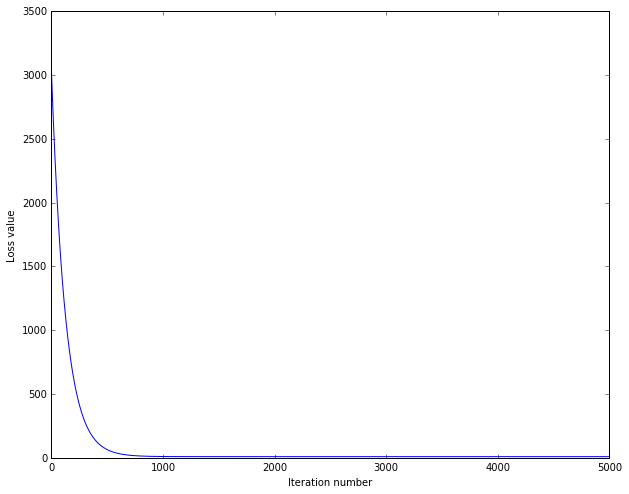

iteration 0 / 5000: loss 6086.623445
iteration 100 / 5000: loss 1228.178170
iteration 200 / 5000: loss 253.571060
iteration 300 / 5000: loss 58.060788
iteration 400 / 5000: loss 18.841166
iteration 500 / 5000: loss 10.974096
iteration 600 / 5000: loss 9.396061
iteration 700 / 5000: loss 9.079484
iteration 800 / 5000: loss 9.015917
iteration 900 / 5000: loss 9.003204
iteration 1000 / 5000: loss 9.000636
iteration 1100 / 5000: loss 9.000124
iteration 1200 / 5000: loss 9.000022
iteration 1300 / 5000: loss 9.000002
iteration 1400 / 5000: loss 8.999998
iteration 1500 / 5000: loss 8.999997
iteration 1600 / 5000: loss 8.999995
iteration 1700 / 5000: loss 8.999996
iteration 1800 / 5000: loss 8.999996
iteration 1900 / 5000: loss 8.999996
iteration 2000 / 5000: loss 8.999996
iteration 2100 / 5000: loss 8.999996
iteration 2200 / 5000: loss 8.999997
iteration 2300 / 5000: loss 8.999994
iteration 2400 / 5000: loss 8.999995
iteration 2500 / 5000: loss 8.999997
iteration 2600 / 5000: loss 8.999996
it

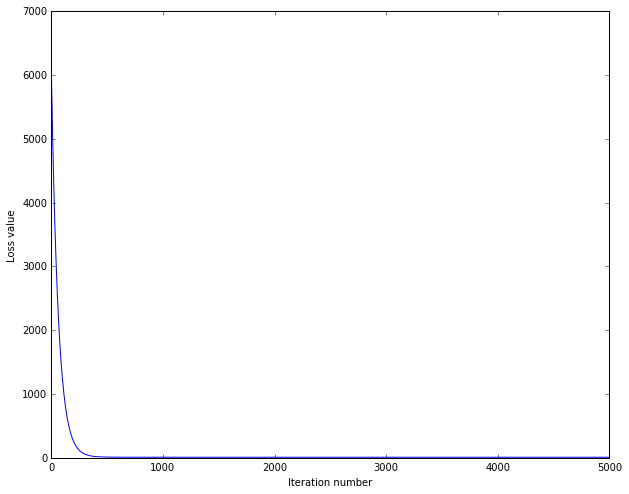

iteration 0 / 5000: loss 3290.914773
iteration 100 / 5000: loss 139.361839
iteration 200 / 5000: loss 14.178177
iteration 300 / 5000: loss 9.205657
iteration 400 / 5000: loss 9.008174
iteration 500 / 5000: loss 9.000316
iteration 600 / 5000: loss 9.000005
iteration 700 / 5000: loss 8.999991
iteration 800 / 5000: loss 8.999993
iteration 900 / 5000: loss 8.999992
iteration 1000 / 5000: loss 8.999991
iteration 1100 / 5000: loss 8.999990
iteration 1200 / 5000: loss 8.999990
iteration 1300 / 5000: loss 8.999992
iteration 1400 / 5000: loss 8.999993
iteration 1500 / 5000: loss 8.999991
iteration 1600 / 5000: loss 8.999991
iteration 1700 / 5000: loss 8.999992
iteration 1800 / 5000: loss 8.999993
iteration 1900 / 5000: loss 8.999991
iteration 2000 / 5000: loss 8.999991
iteration 2100 / 5000: loss 8.999992
iteration 2200 / 5000: loss 8.999992
iteration 2300 / 5000: loss 8.999991
iteration 2400 / 5000: loss 8.999992
iteration 2500 / 5000: loss 8.999992
iteration 2600 / 5000: loss 8.999991
iterati

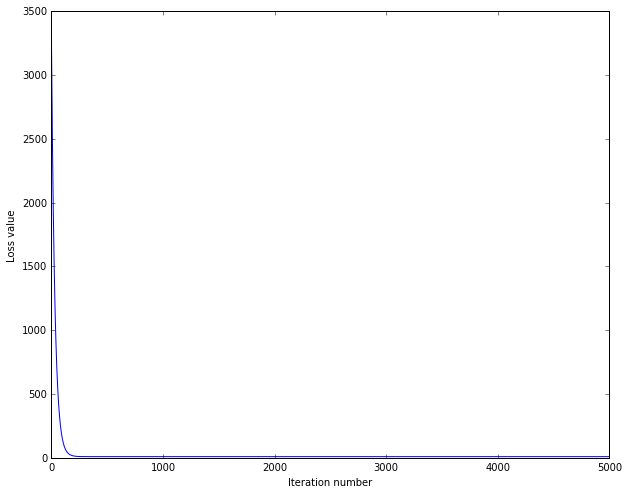

iteration 0 / 5000: loss 6263.528825
iteration 100 / 5000: loss 18.359869
iteration 200 / 5000: loss 9.014010
iteration 300 / 5000: loss 9.000016
iteration 400 / 5000: loss 8.999997
iteration 500 / 5000: loss 8.999996
iteration 600 / 5000: loss 8.999995
iteration 700 / 5000: loss 8.999996
iteration 800 / 5000: loss 8.999995
iteration 900 / 5000: loss 8.999995
iteration 1000 / 5000: loss 8.999996
iteration 1100 / 5000: loss 8.999995
iteration 1200 / 5000: loss 8.999996
iteration 1300 / 5000: loss 8.999996
iteration 1400 / 5000: loss 8.999996
iteration 1500 / 5000: loss 8.999995
iteration 1600 / 5000: loss 8.999995
iteration 1700 / 5000: loss 8.999996
iteration 1800 / 5000: loss 8.999995
iteration 1900 / 5000: loss 8.999996
iteration 2000 / 5000: loss 8.999995
iteration 2100 / 5000: loss 8.999996
iteration 2200 / 5000: loss 8.999996
iteration 2300 / 5000: loss 8.999996
iteration 2400 / 5000: loss 8.999996
iteration 2500 / 5000: loss 8.999995
iteration 2600 / 5000: loss 8.999996
iteration

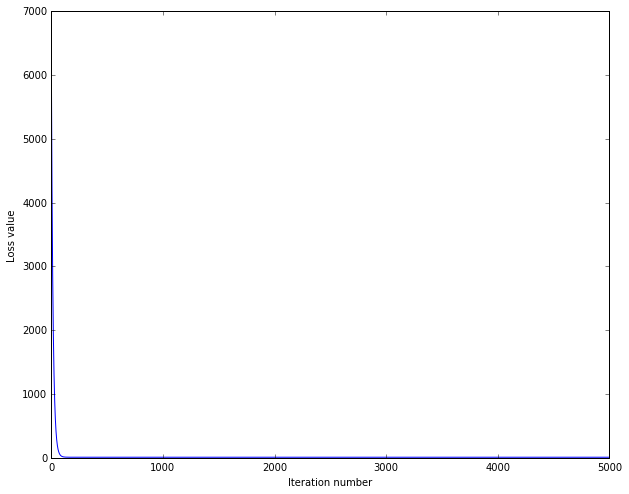

lr 1.000000e-09 reg 1.000000e+04 train accuracy: 0.112816 val accuracy: 0.098000
lr 1.000000e-09 reg 2.000000e+04 train accuracy: 0.087286 val accuracy: 0.092000
lr 1.000000e-09 reg 1.000000e+06 train accuracy: 0.113245 val accuracy: 0.117000
lr 1.000000e-09 reg 2.000000e+06 train accuracy: 0.408122 val accuracy: 0.414000
lr 1.000000e-09 reg 4.000000e+06 train accuracy: 0.414224 val accuracy: 0.418000
lr 1.000000e-09 reg 8.000000e+06 train accuracy: 0.416286 val accuracy: 0.424000
lr 4.000000e-09 reg 1.000000e+04 train accuracy: 0.104082 val accuracy: 0.125000
lr 4.000000e-09 reg 2.000000e+04 train accuracy: 0.089918 val accuracy: 0.085000
lr 4.000000e-09 reg 1.000000e+06 train accuracy: 0.416388 val accuracy: 0.418000
lr 4.000000e-09 reg 2.000000e+06 train accuracy: 0.415939 val accuracy: 0.428000
lr 4.000000e-09 reg 4.000000e+06 train accuracy: 0.409184 val accuracy: 0.420000
lr 4.000000e-09 reg 8.000000e+06 train accuracy: 0.409143 val accuracy: 0.412000
lr 1.000000e-08 reg 4.000000

In [19]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-9, 4e-9]
regularization_strengths = [4e6, 8e6]

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
svm = LinearSVM()
for lr in learning_rates:
    for reg in regularization_strengths:
        svm = LinearSVM()
        loss_hist = svm.train(X_train_feats, y_train, learning_rate=lr, reg=reg,
                      num_iters=5000, verbose=True)
        y_train_pred = svm.predict(X_train_feats)
        train_accuracy = np.mean(y_train == y_train_pred)
        y_val_pred = svm.predict(X_val_feats)
        val_accuracy = np.mean(y_val == y_val_pred)
        results[(lr, reg)] = (train_accuracy, val_accuracy)
        if val_accuracy > best_val:
            print 'Validation Accuracy: {}'.format(val_accuracy)
            best_val = val_accuracy
            best_svm = svm
        plt.plot(loss_hist)
        plt.xlabel('Iteration number')
        plt.ylabel('Loss value')
        plt.show()
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print 'lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy)
    
print 'best validation accuracy achieved during cross-validation: %f' % best_val

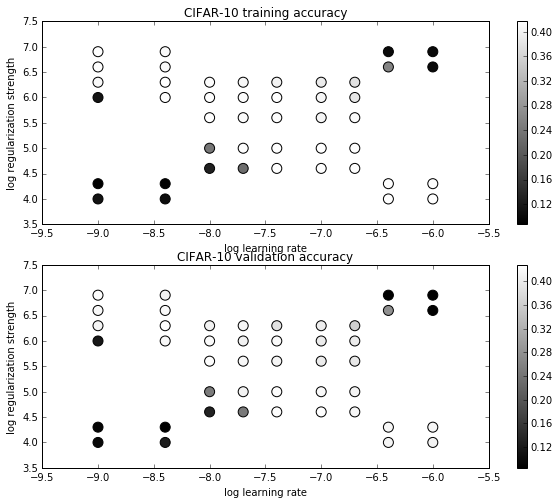

In [20]:
# Visualize the cross-validation results
import math
x_scatter = [math.log10(x[0]) for x in results]
y_scatter = [math.log10(x[1]) for x in results]

# plot training accuracy
marker_size = 100
colors = [results[x][0] for x in results]
plt.subplot(2, 1, 1)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 training accuracy')

# plot validation accuracy
colors = [results[x][1] for x in results] # default size of markers is 20
plt.subplot(2, 1, 2)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 validation accuracy')
plt.show()

In [21]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print test_accuracy

0.416


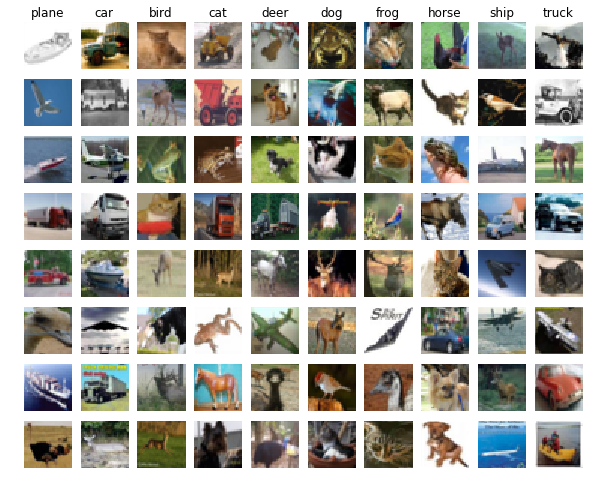

In [22]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [23]:
print X_train_feats.shape

(49000, 155)


In [57]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_size = X_train_feats.shape[1]
hidden_size = 1500
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e0, learning_rate_decay=0.95,
            reg=1e-3, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val_feats) == y_val).mean()
print 'Validation accuracy: ', val_acc

iteration 0 / 1000: loss 2.302586
iteration 100 / 1000: loss 1.507036
iteration 200 / 1000: loss 1.392795
iteration 300 / 1000: loss 1.289946
iteration 400 / 1000: loss 1.287021
iteration 500 / 1000: loss 1.321420
iteration 600 / 1000: loss 1.163484
iteration 700 / 1000: loss 1.141825
iteration 800 / 1000: loss 1.109892
iteration 900 / 1000: loss 1.101211
Validation accuracy:  0.577


(750.0, 0.75, 0.00075000000000000002)
iteration 0 / 5000: loss 2.302585
iteration 100 / 5000: loss 1.537482
iteration 200 / 5000: loss 1.418212
iteration 300 / 5000: loss 1.249559
iteration 400 / 5000: loss 1.316945
iteration 500 / 5000: loss 1.102887
iteration 600 / 5000: loss 1.272004
iteration 700 / 5000: loss 1.077609
iteration 800 / 5000: loss 1.154482
iteration 900 / 5000: loss 1.010155
iteration 1000 / 5000: loss 1.016806
iteration 1100 / 5000: loss 0.976540
iteration 1200 / 5000: loss 1.092950
iteration 1300 / 5000: loss 1.000743
iteration 1400 / 5000: loss 0.925139
iteration 1500 / 5000: loss 1.040955
iteration 1600 / 5000: loss 0.990828
iteration 1700 / 5000: loss 1.028960
iteration 1800 / 5000: loss 0.954864
iteration 1900 / 5000: loss 0.959608
iteration 2000 / 5000: loss 0.777617
iteration 2100 / 5000: loss 0.949013
iteration 2200 / 5000: loss 0.894026
iteration 2300 / 5000: loss 0.831992
iteration 2400 / 5000: loss 0.875514
iteration 2500 / 5000: loss 0.794094
iteration 26

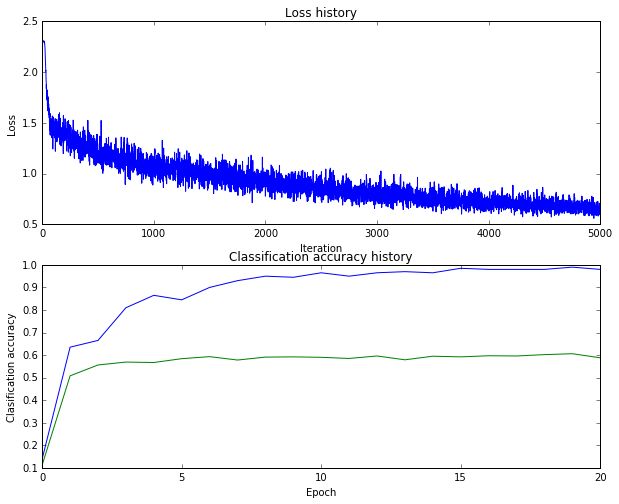

(750.0, 0.75, 0.001)
iteration 0 / 5000: loss 2.302586
iteration 100 / 5000: loss 1.485892
iteration 200 / 5000: loss 1.485643
iteration 300 / 5000: loss 1.107840
iteration 400 / 5000: loss 1.244061
iteration 500 / 5000: loss 1.093328
iteration 600 / 5000: loss 1.248570
iteration 700 / 5000: loss 1.214606
iteration 800 / 5000: loss 1.217692
iteration 900 / 5000: loss 1.130247
iteration 1000 / 5000: loss 1.138377
iteration 1100 / 5000: loss 1.179930
iteration 1200 / 5000: loss 1.138673
iteration 1300 / 5000: loss 0.947247
iteration 1400 / 5000: loss 1.076533
iteration 1500 / 5000: loss 0.996504
iteration 1600 / 5000: loss 1.028066
iteration 1700 / 5000: loss 0.913604
iteration 1800 / 5000: loss 0.842031
iteration 1900 / 5000: loss 0.931312
iteration 2000 / 5000: loss 0.993628
iteration 2100 / 5000: loss 0.912430
iteration 2200 / 5000: loss 0.906808
iteration 2300 / 5000: loss 1.040637
iteration 2400 / 5000: loss 0.991691
iteration 2500 / 5000: loss 0.990067
iteration 2600 / 5000: loss 0

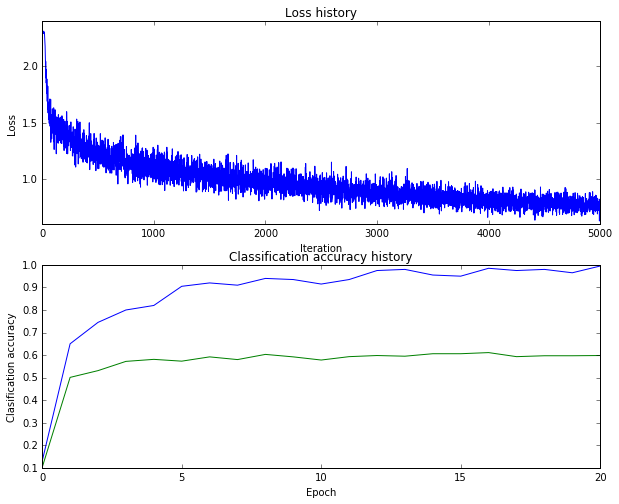

(750.0, 0.75, 0.0015)
iteration 0 / 5000: loss 2.302586
iteration 100 / 5000: loss 1.357280
iteration 200 / 5000: loss 1.444104
iteration 300 / 5000: loss 1.375111
iteration 400 / 5000: loss 1.423443
iteration 500 / 5000: loss 1.278418
iteration 600 / 5000: loss 1.088863
iteration 700 / 5000: loss 1.228522
iteration 800 / 5000: loss 1.218395
iteration 900 / 5000: loss 1.261620
iteration 1000 / 5000: loss 1.160543
iteration 1100 / 5000: loss 1.101590
iteration 1200 / 5000: loss 1.121405
iteration 1300 / 5000: loss 1.018909
iteration 1400 / 5000: loss 1.098438
iteration 1500 / 5000: loss 1.106426
iteration 1600 / 5000: loss 1.090824
iteration 1700 / 5000: loss 1.148686
iteration 1800 / 5000: loss 1.010133
iteration 1900 / 5000: loss 1.071746
iteration 2000 / 5000: loss 1.105800
iteration 2100 / 5000: loss 0.999318
iteration 2200 / 5000: loss 1.144999
iteration 2300 / 5000: loss 1.087935
iteration 2400 / 5000: loss 1.031621
iteration 2500 / 5000: loss 0.989133
iteration 2600 / 5000: loss 

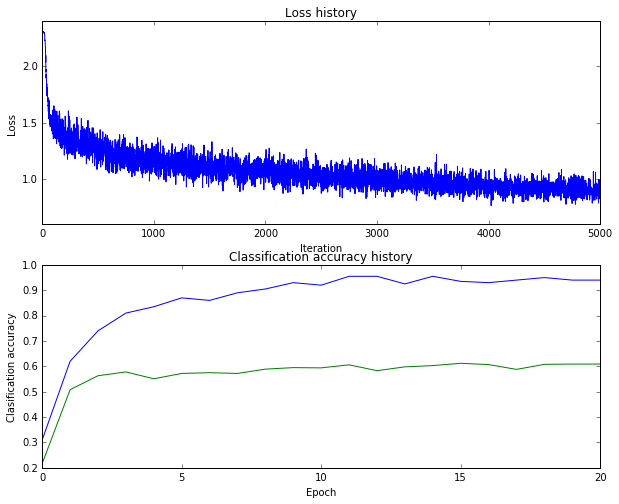

(750.0, 1.0, 0.00075000000000000002)
iteration 0 / 5000: loss 2.302585
iteration 100 / 5000: loss 1.568578
iteration 200 / 5000: loss 1.415461
iteration 300 / 5000: loss 1.299110
iteration 400 / 5000: loss 1.344882
iteration 500 / 5000: loss 1.181405
iteration 600 / 5000: loss 1.133346
iteration 700 / 5000: loss 1.221220
iteration 800 / 5000: loss 1.154322
iteration 900 / 5000: loss 1.096830
iteration 1000 / 5000: loss 1.151422
iteration 1100 / 5000: loss 1.048833
iteration 1200 / 5000: loss 0.963860
iteration 1300 / 5000: loss 1.031723
iteration 1400 / 5000: loss 1.105870
iteration 1500 / 5000: loss 0.991374
iteration 1600 / 5000: loss 0.973781
iteration 1700 / 5000: loss 0.953566
iteration 1800 / 5000: loss 0.997598
iteration 1900 / 5000: loss 1.032658
iteration 2000 / 5000: loss 0.900295
iteration 2100 / 5000: loss 0.841341
iteration 2200 / 5000: loss 0.959803
iteration 2300 / 5000: loss 0.895977
iteration 2400 / 5000: loss 0.921148
iteration 2500 / 5000: loss 0.910294
iteration 260

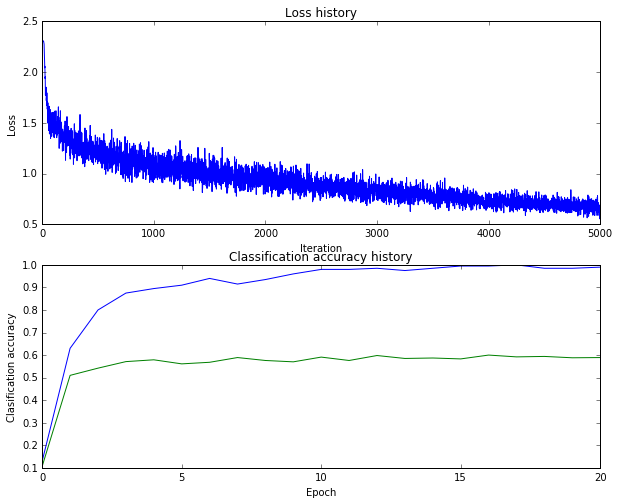

(750.0, 1.0, 0.001)
iteration 0 / 5000: loss 2.302586
iteration 100 / 5000: loss 1.604611
iteration 200 / 5000: loss 1.385116
iteration 300 / 5000: loss 1.358439
iteration 400 / 5000: loss 1.196008
iteration 500 / 5000: loss 1.239832
iteration 600 / 5000: loss 1.120505
iteration 700 / 5000: loss 1.183855
iteration 800 / 5000: loss 1.223127
iteration 900 / 5000: loss 1.123869
iteration 1000 / 5000: loss 1.183580
iteration 1100 / 5000: loss 1.089969
iteration 1200 / 5000: loss 1.031695
iteration 1300 / 5000: loss 1.119877
iteration 1400 / 5000: loss 1.013430
iteration 1500 / 5000: loss 1.067918
iteration 1600 / 5000: loss 1.057310
iteration 1700 / 5000: loss 1.091740
iteration 1800 / 5000: loss 1.068873
iteration 1900 / 5000: loss 0.975635
iteration 2000 / 5000: loss 1.056026
iteration 2100 / 5000: loss 1.039920
iteration 2200 / 5000: loss 1.067107
iteration 2300 / 5000: loss 0.978981
iteration 2400 / 5000: loss 1.117348
iteration 2500 / 5000: loss 0.911267
iteration 2600 / 5000: loss 0.

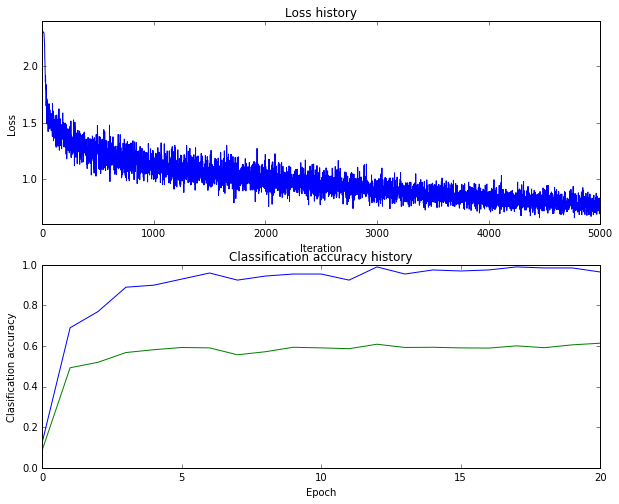

(750.0, 1.0, 0.0015)
iteration 0 / 5000: loss 2.302586
iteration 100 / 5000: loss 1.631941
iteration 200 / 5000: loss 1.382434
iteration 300 / 5000: loss 1.331239
iteration 400 / 5000: loss 1.304807
iteration 500 / 5000: loss 1.349450
iteration 600 / 5000: loss 1.239559
iteration 700 / 5000: loss 1.315284
iteration 800 / 5000: loss 1.187743
iteration 900 / 5000: loss 1.058488
iteration 1000 / 5000: loss 1.127860
iteration 1100 / 5000: loss 1.092302
iteration 1200 / 5000: loss 1.124517
iteration 1300 / 5000: loss 1.112612
iteration 1400 / 5000: loss 1.114330
iteration 1500 / 5000: loss 1.095964
iteration 1600 / 5000: loss 1.143353
iteration 1700 / 5000: loss 1.045165
iteration 1800 / 5000: loss 1.109800
iteration 1900 / 5000: loss 1.107364
iteration 2000 / 5000: loss 1.041418
iteration 2100 / 5000: loss 1.097442
iteration 2200 / 5000: loss 1.058299
iteration 2300 / 5000: loss 1.130705
iteration 2400 / 5000: loss 1.034133
iteration 2500 / 5000: loss 0.903008
iteration 2600 / 5000: loss 1

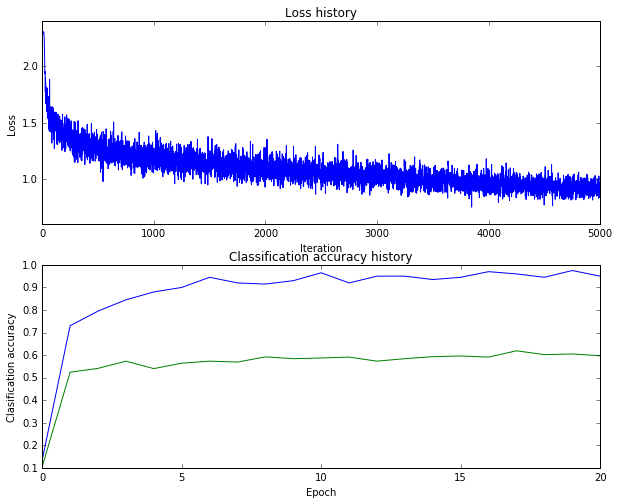

(750.0, 1.5, 0.00075000000000000002)
iteration 0 / 5000: loss 2.302585
iteration 100 / 5000: loss 1.411476
iteration 200 / 5000: loss 1.433559
iteration 300 / 5000: loss 1.200781
iteration 400 / 5000: loss 1.339004
iteration 500 / 5000: loss 1.181212
iteration 600 / 5000: loss 1.240315
iteration 700 / 5000: loss 1.174359
iteration 800 / 5000: loss 1.021837
iteration 900 / 5000: loss 1.210299
iteration 1000 / 5000: loss 1.157412
iteration 1100 / 5000: loss 1.200292
iteration 1200 / 5000: loss 0.965677
iteration 1300 / 5000: loss 1.210229
iteration 1400 / 5000: loss 0.933198
iteration 1500 / 5000: loss 1.150591
iteration 1600 / 5000: loss 1.226845
iteration 1700 / 5000: loss 0.975747
iteration 1800 / 5000: loss 1.030394
iteration 1900 / 5000: loss 0.911189
iteration 2000 / 5000: loss 0.985566
iteration 2100 / 5000: loss 0.969344
iteration 2200 / 5000: loss 0.885159
iteration 2300 / 5000: loss 1.058928
iteration 2400 / 5000: loss 0.940385
iteration 2500 / 5000: loss 1.041237
iteration 260

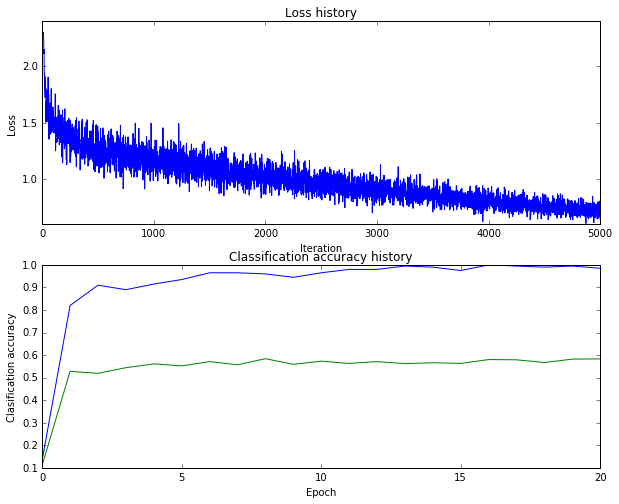

(750.0, 1.5, 0.001)
iteration 0 / 5000: loss 2.302586
iteration 100 / 5000: loss 1.400415
iteration 200 / 5000: loss 1.481141
iteration 300 / 5000: loss 1.273776
iteration 400 / 5000: loss 1.285812
iteration 500 / 5000: loss 1.354904
iteration 600 / 5000: loss 1.204948
iteration 700 / 5000: loss 1.360133
iteration 800 / 5000: loss 1.218819
iteration 900 / 5000: loss 1.063299
iteration 1000 / 5000: loss 1.038035
iteration 1100 / 5000: loss 1.291918
iteration 1200 / 5000: loss 1.222958
iteration 1300 / 5000: loss 1.140541
iteration 1400 / 5000: loss 1.200516
iteration 1500 / 5000: loss 0.948796
iteration 1600 / 5000: loss 1.106426
iteration 1700 / 5000: loss 1.043626
iteration 1800 / 5000: loss 1.015263
iteration 1900 / 5000: loss 1.133227
iteration 2000 / 5000: loss 1.189594
iteration 2100 / 5000: loss 0.978666
iteration 2200 / 5000: loss 0.983100
iteration 2300 / 5000: loss 1.166254
iteration 2400 / 5000: loss 1.145711
iteration 2500 / 5000: loss 1.115022
iteration 2600 / 5000: loss 0.

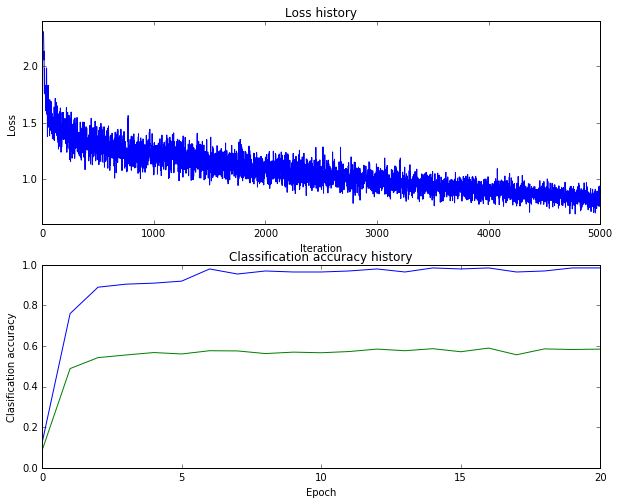

(750.0, 1.5, 0.0015)
iteration 0 / 5000: loss 2.302586
iteration 100 / 5000: loss 1.373659
iteration 200 / 5000: loss 1.380284
iteration 300 / 5000: loss 1.449470
iteration 400 / 5000: loss 1.383253
iteration 500 / 5000: loss 1.238200
iteration 600 / 5000: loss 1.362617
iteration 700 / 5000: loss 1.189327
iteration 800 / 5000: loss 1.381884
iteration 900 / 5000: loss 1.386746
iteration 1000 / 5000: loss 1.309063
iteration 1100 / 5000: loss 1.161058
iteration 1200 / 5000: loss 1.263894
iteration 1300 / 5000: loss 1.263743
iteration 1400 / 5000: loss 1.258307
iteration 1500 / 5000: loss 1.247013
iteration 1600 / 5000: loss 1.222666
iteration 1700 / 5000: loss 1.208245
iteration 1800 / 5000: loss 1.176992
iteration 1900 / 5000: loss 1.126758
iteration 2000 / 5000: loss 1.177011
iteration 2100 / 5000: loss 1.141090
iteration 2200 / 5000: loss 1.238540
iteration 2300 / 5000: loss 1.157685
iteration 2400 / 5000: loss 1.123876
iteration 2500 / 5000: loss 1.233074
iteration 2600 / 5000: loss 1

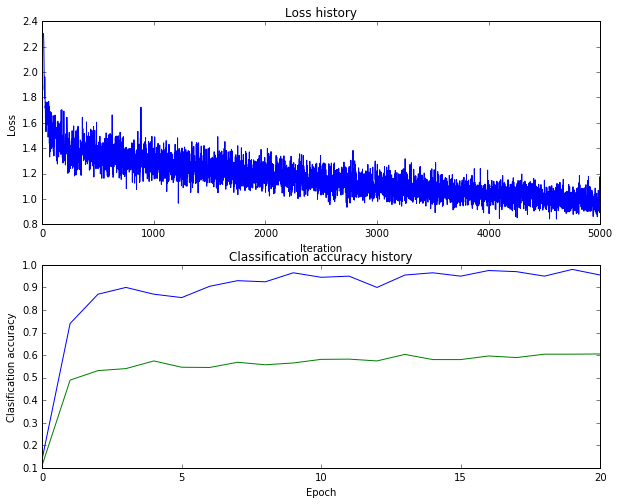

(1000.0, 0.75, 0.00075000000000000002)
iteration 0 / 5000: loss 2.302586
iteration 100 / 5000: loss 1.545589
iteration 200 / 5000: loss 1.466440
iteration 300 / 5000: loss 1.292257
iteration 400 / 5000: loss 1.237176
iteration 500 / 5000: loss 1.232060
iteration 600 / 5000: loss 1.181546
iteration 700 / 5000: loss 1.316680
iteration 800 / 5000: loss 1.120786
iteration 900 / 5000: loss 1.242352
iteration 1000 / 5000: loss 1.153389
iteration 1100 / 5000: loss 1.069751
iteration 1200 / 5000: loss 1.112691
iteration 1300 / 5000: loss 0.990930
iteration 1400 / 5000: loss 1.033550
iteration 1500 / 5000: loss 0.965384
iteration 1600 / 5000: loss 0.873240
iteration 1700 / 5000: loss 0.912044
iteration 1800 / 5000: loss 0.823331
iteration 1900 / 5000: loss 0.883793
iteration 2000 / 5000: loss 0.902795
iteration 2100 / 5000: loss 0.869510
iteration 2200 / 5000: loss 0.960070
iteration 2300 / 5000: loss 0.825282
iteration 2400 / 5000: loss 0.873653
iteration 2500 / 5000: loss 0.873961
iteration 2

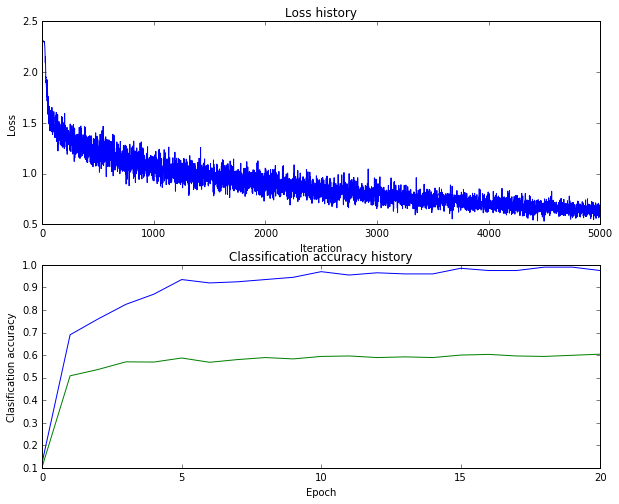

(1000.0, 0.75, 0.001)
iteration 0 / 5000: loss 2.302586
iteration 100 / 5000: loss 1.535253
iteration 200 / 5000: loss 1.454942
iteration 300 / 5000: loss 1.279005
iteration 400 / 5000: loss 1.295718
iteration 500 / 5000: loss 1.220804
iteration 600 / 5000: loss 1.135191
iteration 700 / 5000: loss 1.150239
iteration 800 / 5000: loss 1.273541
iteration 900 / 5000: loss 1.111858
iteration 1000 / 5000: loss 1.069875
iteration 1100 / 5000: loss 0.920756
iteration 1200 / 5000: loss 0.877474
iteration 1300 / 5000: loss 1.101508
iteration 1400 / 5000: loss 1.141821
iteration 1500 / 5000: loss 1.004596
iteration 1600 / 5000: loss 1.042049
iteration 1700 / 5000: loss 1.069854
iteration 1800 / 5000: loss 1.005036
iteration 1900 / 5000: loss 0.986080
iteration 2000 / 5000: loss 1.005022
iteration 2100 / 5000: loss 1.024576
iteration 2200 / 5000: loss 0.931128
iteration 2300 / 5000: loss 0.833393
iteration 2400 / 5000: loss 0.964287
iteration 2500 / 5000: loss 0.861503
iteration 2600 / 5000: loss 

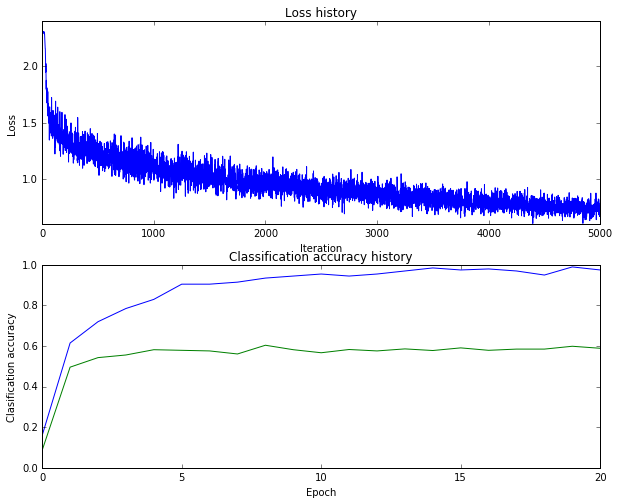

(1000.0, 0.75, 0.0015)
iteration 0 / 5000: loss 2.302586
iteration 100 / 5000: loss 1.346396
iteration 200 / 5000: loss 1.342560
iteration 300 / 5000: loss 1.358685
iteration 400 / 5000: loss 1.330091
iteration 500 / 5000: loss 1.355336
iteration 600 / 5000: loss 1.249743
iteration 700 / 5000: loss 1.261509
iteration 800 / 5000: loss 1.256132
iteration 900 / 5000: loss 1.104968
iteration 1000 / 5000: loss 0.990752
iteration 1100 / 5000: loss 1.094072
iteration 1200 / 5000: loss 1.103800
iteration 1300 / 5000: loss 1.119332
iteration 1400 / 5000: loss 1.007704
iteration 1500 / 5000: loss 1.116165
iteration 1600 / 5000: loss 1.130390
iteration 1700 / 5000: loss 1.149139
iteration 1800 / 5000: loss 1.117919
iteration 1900 / 5000: loss 1.058530
iteration 2000 / 5000: loss 1.082334
iteration 2100 / 5000: loss 1.197214
iteration 2200 / 5000: loss 1.109031
iteration 2300 / 5000: loss 1.107942
iteration 2400 / 5000: loss 0.997636
iteration 2500 / 5000: loss 1.146148
iteration 2600 / 5000: loss

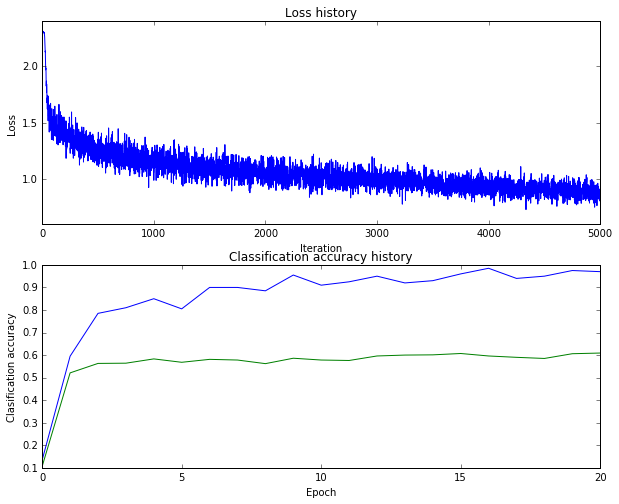

(1000.0, 1.0, 0.00075000000000000002)
iteration 0 / 5000: loss 2.302586
iteration 100 / 5000: loss 1.442028
iteration 200 / 5000: loss 1.387450
iteration 300 / 5000: loss 1.465639
iteration 400 / 5000: loss 1.319900
iteration 500 / 5000: loss 1.212068
iteration 600 / 5000: loss 1.132192
iteration 700 / 5000: loss 1.169587
iteration 800 / 5000: loss 1.185245
iteration 900 / 5000: loss 1.094396
iteration 1000 / 5000: loss 1.169693
iteration 1100 / 5000: loss 1.208454
iteration 1200 / 5000: loss 1.132327
iteration 1300 / 5000: loss 0.999241
iteration 1400 / 5000: loss 0.966057
iteration 1500 / 5000: loss 0.864113
iteration 1600 / 5000: loss 0.948288
iteration 1700 / 5000: loss 1.007556
iteration 1800 / 5000: loss 0.971284
iteration 1900 / 5000: loss 1.139326
iteration 2000 / 5000: loss 0.857475
iteration 2100 / 5000: loss 0.969750
iteration 2200 / 5000: loss 1.039030
iteration 2300 / 5000: loss 0.897666
iteration 2400 / 5000: loss 1.014898
iteration 2500 / 5000: loss 0.972871
iteration 26

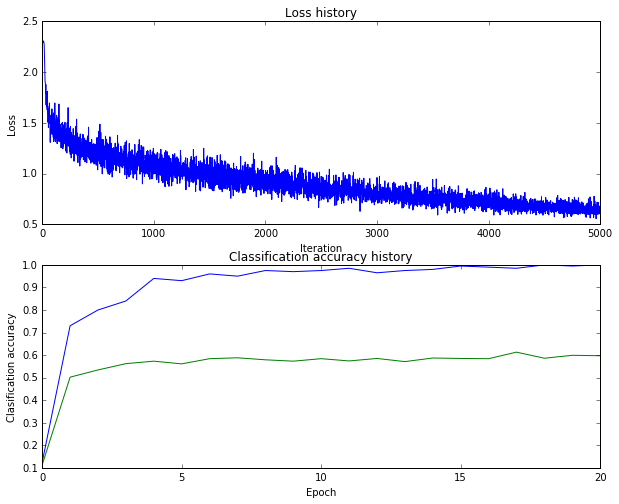

(1000.0, 1.0, 0.001)
iteration 0 / 5000: loss 2.302586
iteration 100 / 5000: loss 1.442249
iteration 200 / 5000: loss 1.409561
iteration 300 / 5000: loss 1.317619
iteration 400 / 5000: loss 1.180038
iteration 500 / 5000: loss 1.242815
iteration 600 / 5000: loss 1.164948
iteration 700 / 5000: loss 1.176901
iteration 800 / 5000: loss 1.133350
iteration 900 / 5000: loss 1.231706
iteration 1000 / 5000: loss 1.081219
iteration 1100 / 5000: loss 1.058217
iteration 1200 / 5000: loss 1.239057
iteration 1300 / 5000: loss 0.943113
iteration 1400 / 5000: loss 0.966012
iteration 1500 / 5000: loss 1.001449
iteration 1600 / 5000: loss 1.025697
iteration 1700 / 5000: loss 1.013429
iteration 1800 / 5000: loss 0.974836
iteration 1900 / 5000: loss 0.957711
iteration 2000 / 5000: loss 0.996050
iteration 2100 / 5000: loss 0.980136
iteration 2200 / 5000: loss 1.001209
iteration 2300 / 5000: loss 0.945541
iteration 2400 / 5000: loss 0.937233
iteration 2500 / 5000: loss 0.890454
iteration 2600 / 5000: loss 0

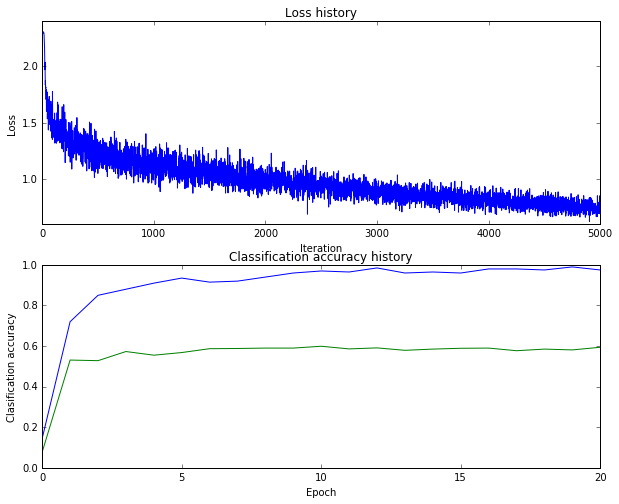

(1000.0, 1.0, 0.0015)
iteration 0 / 5000: loss 2.302586
iteration 100 / 5000: loss 1.516651
iteration 200 / 5000: loss 1.402915
iteration 300 / 5000: loss 1.461906
iteration 400 / 5000: loss 1.375128
iteration 500 / 5000: loss 1.246967
iteration 600 / 5000: loss 1.205538
iteration 700 / 5000: loss 1.250109
iteration 800 / 5000: loss 1.267106
iteration 900 / 5000: loss 1.176554
iteration 1000 / 5000: loss 1.051123
iteration 1100 / 5000: loss 1.192862
iteration 1200 / 5000: loss 1.074308
iteration 1300 / 5000: loss 1.239936
iteration 1400 / 5000: loss 1.229077
iteration 1500 / 5000: loss 1.138430
iteration 1600 / 5000: loss 1.238918
iteration 1700 / 5000: loss 1.128329
iteration 1800 / 5000: loss 1.016904
iteration 1900 / 5000: loss 0.982922
iteration 2000 / 5000: loss 0.940808
iteration 2100 / 5000: loss 1.104316
iteration 2200 / 5000: loss 1.028854
iteration 2300 / 5000: loss 1.050433
iteration 2400 / 5000: loss 1.047712
iteration 2500 / 5000: loss 1.014330
iteration 2600 / 5000: loss 

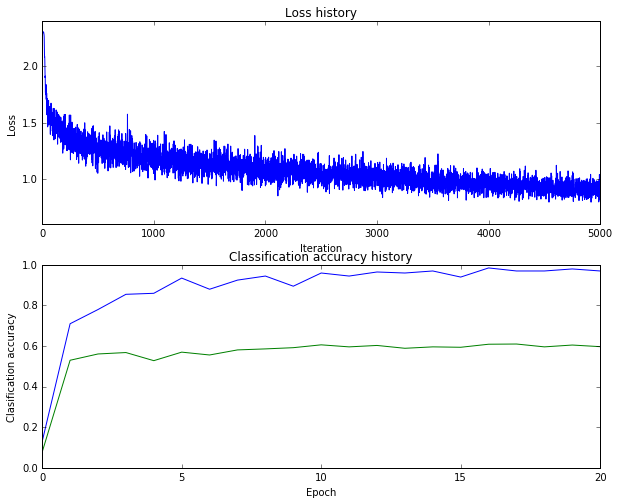

(1000.0, 1.5, 0.00075000000000000002)
iteration 0 / 5000: loss 2.302586
iteration 100 / 5000: loss 1.436017
iteration 200 / 5000: loss 1.488422
iteration 300 / 5000: loss 1.359819
iteration 400 / 5000: loss 1.311822
iteration 500 / 5000: loss 1.200871
iteration 600 / 5000: loss 1.204967
iteration 700 / 5000: loss 1.124053
iteration 800 / 5000: loss 1.229863
iteration 900 / 5000: loss 1.212572
iteration 1000 / 5000: loss 1.256667
iteration 1100 / 5000: loss 1.110606
iteration 1200 / 5000: loss 1.082213
iteration 1300 / 5000: loss 1.050732
iteration 1400 / 5000: loss 0.991175
iteration 1500 / 5000: loss 0.947507
iteration 1600 / 5000: loss 0.987183
iteration 1700 / 5000: loss 1.155932
iteration 1800 / 5000: loss 0.919731
iteration 1900 / 5000: loss 1.072610
iteration 2000 / 5000: loss 1.027826
iteration 2100 / 5000: loss 1.065861
iteration 2200 / 5000: loss 0.979890
iteration 2300 / 5000: loss 0.892053
iteration 2400 / 5000: loss 0.954764
iteration 2500 / 5000: loss 1.074458
iteration 26

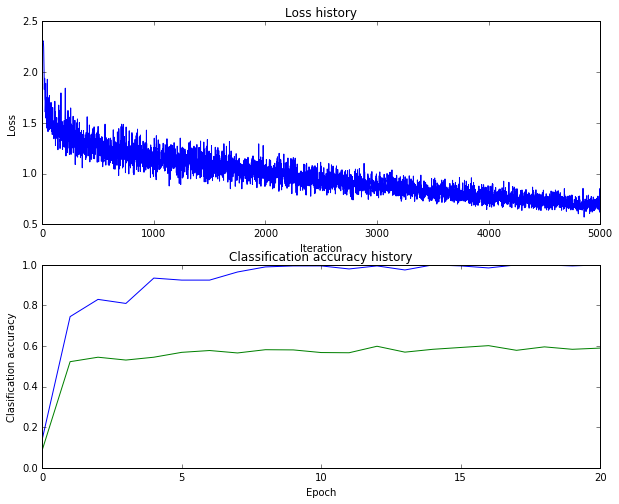

(1000.0, 1.5, 0.001)
iteration 0 / 5000: loss 2.302586
iteration 100 / 5000: loss 1.505492
iteration 200 / 5000: loss 1.421760
iteration 300 / 5000: loss 1.362370
iteration 400 / 5000: loss 1.239180
iteration 500 / 5000: loss 1.175818
iteration 600 / 5000: loss 1.225640
iteration 700 / 5000: loss 1.261991
iteration 800 / 5000: loss 1.175361
iteration 900 / 5000: loss 1.330015
iteration 1000 / 5000: loss 1.142377
iteration 1100 / 5000: loss 1.180776
iteration 1200 / 5000: loss 1.174469
iteration 1300 / 5000: loss 1.137337
iteration 1400 / 5000: loss 1.242095
iteration 1500 / 5000: loss 1.044571
iteration 1600 / 5000: loss 1.243394
iteration 1700 / 5000: loss 1.126092
iteration 1800 / 5000: loss 1.107861
iteration 1900 / 5000: loss 1.311249
iteration 2000 / 5000: loss 0.986060
iteration 2100 / 5000: loss 1.052022
iteration 2200 / 5000: loss 1.021314
iteration 2300 / 5000: loss 1.051302
iteration 2400 / 5000: loss 1.035001
iteration 2500 / 5000: loss 1.038347
iteration 2600 / 5000: loss 1

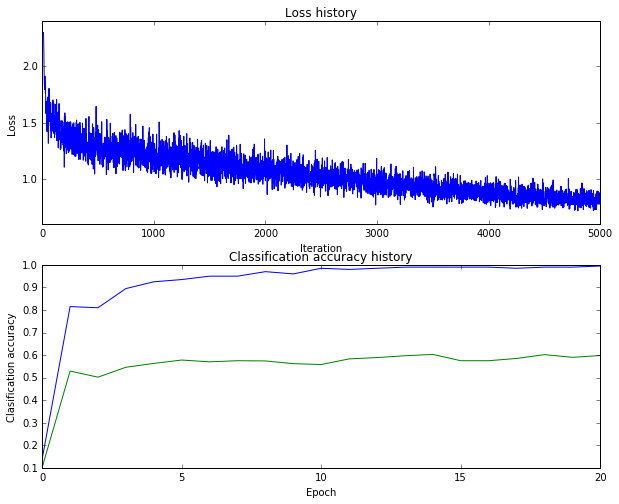

(1000.0, 1.5, 0.0015)
iteration 0 / 5000: loss 2.302586
iteration 100 / 5000: loss 1.406649
iteration 200 / 5000: loss 1.456187
iteration 300 / 5000: loss 1.257305
iteration 400 / 5000: loss 1.292621
iteration 500 / 5000: loss 1.487465
iteration 600 / 5000: loss 1.296395
iteration 700 / 5000: loss 1.451036
iteration 800 / 5000: loss 1.400257
iteration 900 / 5000: loss 1.262793
iteration 1000 / 5000: loss 1.341095
iteration 1100 / 5000: loss 1.130767
iteration 1200 / 5000: loss 1.220436
iteration 1300 / 5000: loss 1.073963
iteration 1400 / 5000: loss 1.334366
iteration 1500 / 5000: loss 1.269849
iteration 1600 / 5000: loss 1.278956
iteration 1700 / 5000: loss 1.167912
iteration 1800 / 5000: loss 1.247011
iteration 1900 / 5000: loss 1.208985
iteration 2000 / 5000: loss 1.227548
iteration 2100 / 5000: loss 1.123003
iteration 2200 / 5000: loss 1.198043
iteration 2300 / 5000: loss 1.118192
iteration 2400 / 5000: loss 1.176463
iteration 2500 / 5000: loss 1.177958
iteration 2600 / 5000: loss 

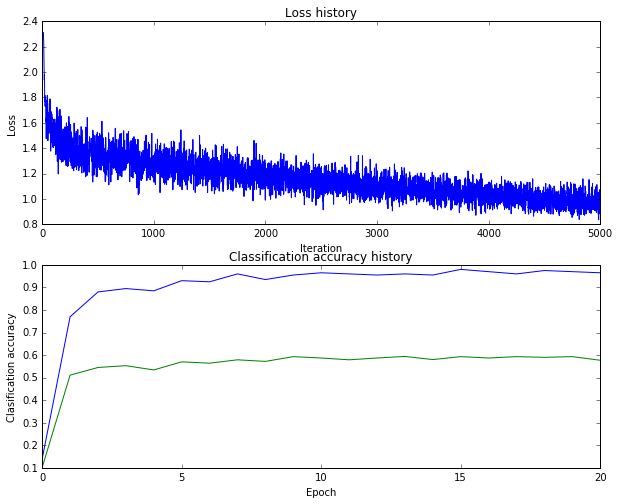

(1500.0, 0.75, 0.00075000000000000002)
iteration 0 / 5000: loss 2.302586
iteration 100 / 5000: loss 1.451566
iteration 200 / 5000: loss 1.367809
iteration 300 / 5000: loss 1.203307
iteration 400 / 5000: loss 1.256960
iteration 500 / 5000: loss 1.220725
iteration 600 / 5000: loss 1.100536
iteration 700 / 5000: loss 1.161090
iteration 800 / 5000: loss 1.212594
iteration 900 / 5000: loss 1.096821
iteration 1000 / 5000: loss 1.003031
iteration 1100 / 5000: loss 1.022771
iteration 1200 / 5000: loss 0.964239
iteration 1300 / 5000: loss 1.017867
iteration 1400 / 5000: loss 1.005456
iteration 1500 / 5000: loss 0.906381
iteration 1600 / 5000: loss 0.895474
iteration 1700 / 5000: loss 0.858843
iteration 1800 / 5000: loss 0.886754
iteration 1900 / 5000: loss 0.877415
iteration 2000 / 5000: loss 0.834005
iteration 2100 / 5000: loss 0.929886
iteration 2200 / 5000: loss 0.851078
iteration 2300 / 5000: loss 0.912748
iteration 2400 / 5000: loss 0.789060
iteration 2500 / 5000: loss 0.809377
iteration 2

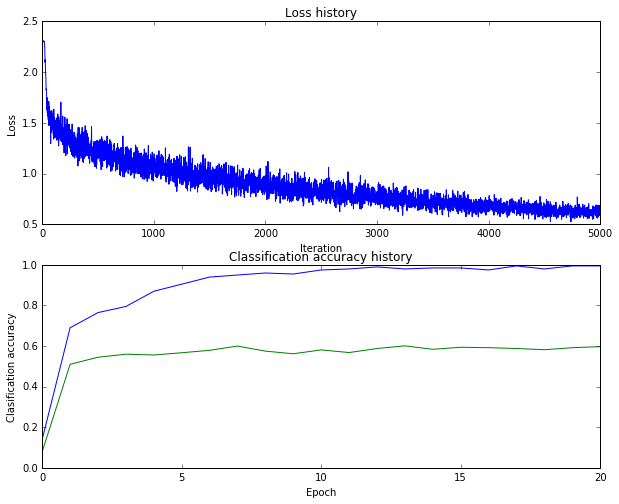

(1500.0, 0.75, 0.001)
iteration 0 / 5000: loss 2.302586
iteration 100 / 5000: loss 1.455662
iteration 200 / 5000: loss 1.482766
iteration 300 / 5000: loss 1.239273
iteration 400 / 5000: loss 1.350798
iteration 500 / 5000: loss 1.317663
iteration 600 / 5000: loss 1.189534
iteration 700 / 5000: loss 1.148737
iteration 800 / 5000: loss 1.160348
iteration 900 / 5000: loss 1.083130
iteration 1000 / 5000: loss 1.053429
iteration 1100 / 5000: loss 1.020013
iteration 1200 / 5000: loss 1.080138
iteration 1300 / 5000: loss 1.067080
iteration 1400 / 5000: loss 1.101569
iteration 1500 / 5000: loss 1.055891
iteration 1600 / 5000: loss 1.053669
iteration 1700 / 5000: loss 0.992047
iteration 1800 / 5000: loss 0.980968
iteration 1900 / 5000: loss 1.065296
iteration 2000 / 5000: loss 0.971355
iteration 2100 / 5000: loss 0.922414
iteration 2200 / 5000: loss 0.941049
iteration 2300 / 5000: loss 0.896693
iteration 2400 / 5000: loss 0.879537
iteration 2500 / 5000: loss 0.990360
iteration 2600 / 5000: loss 

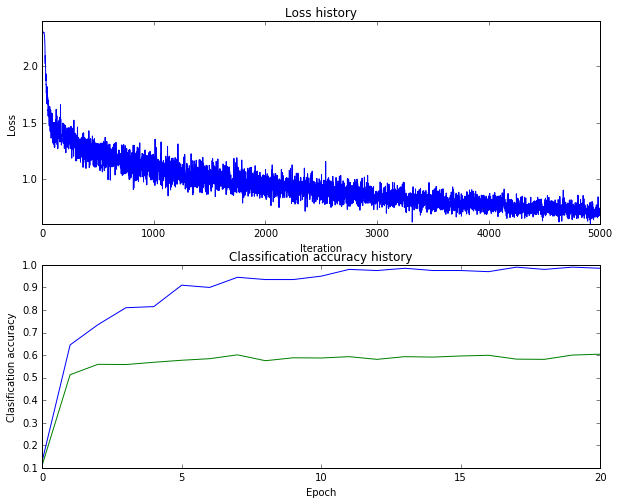

(1500.0, 0.75, 0.0015)
iteration 0 / 5000: loss 2.302586
iteration 100 / 5000: loss 1.450592
iteration 200 / 5000: loss 1.366117
iteration 300 / 5000: loss 1.368702
iteration 400 / 5000: loss 1.381633
iteration 500 / 5000: loss 1.328671
iteration 600 / 5000: loss 1.164023
iteration 700 / 5000: loss 1.220008
iteration 800 / 5000: loss 1.239381
iteration 900 / 5000: loss 1.192201
iteration 1000 / 5000: loss 1.060503
iteration 1100 / 5000: loss 1.031810
iteration 1200 / 5000: loss 1.091534
iteration 1300 / 5000: loss 1.023620
iteration 1400 / 5000: loss 1.136613
iteration 1500 / 5000: loss 1.074309
iteration 1600 / 5000: loss 1.219871
iteration 1700 / 5000: loss 1.143025
iteration 1800 / 5000: loss 1.112676
iteration 1900 / 5000: loss 1.061965
iteration 2000 / 5000: loss 1.028629
iteration 2100 / 5000: loss 0.927222
iteration 2200 / 5000: loss 1.082554
iteration 2300 / 5000: loss 1.141470
iteration 2400 / 5000: loss 0.995200
iteration 2500 / 5000: loss 0.963744
iteration 2600 / 5000: loss

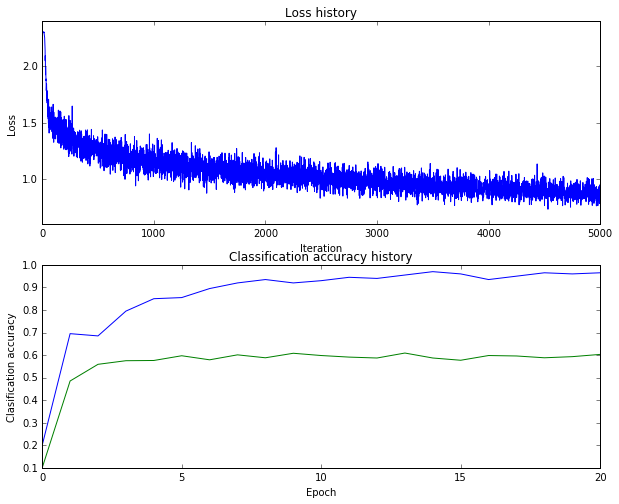

(1500.0, 1.0, 0.00075000000000000002)
iteration 0 / 5000: loss 2.302585
iteration 100 / 5000: loss 1.429345
iteration 200 / 5000: loss 1.385345
iteration 300 / 5000: loss 1.409418
iteration 400 / 5000: loss 1.218436
iteration 500 / 5000: loss 1.374426
iteration 600 / 5000: loss 1.259522
iteration 700 / 5000: loss 1.227290
iteration 800 / 5000: loss 1.134510
iteration 900 / 5000: loss 1.084018
iteration 1000 / 5000: loss 1.163478
iteration 1100 / 5000: loss 0.989330
iteration 1200 / 5000: loss 1.078441
iteration 1300 / 5000: loss 1.093498
iteration 1400 / 5000: loss 1.007466
iteration 1500 / 5000: loss 0.962355
iteration 1600 / 5000: loss 1.009412
iteration 1700 / 5000: loss 0.960923
iteration 1800 / 5000: loss 0.982461
iteration 1900 / 5000: loss 0.834743
iteration 2000 / 5000: loss 0.871581
iteration 2100 / 5000: loss 0.882994
iteration 2200 / 5000: loss 0.992818
iteration 2300 / 5000: loss 0.928327
iteration 2400 / 5000: loss 0.878055
iteration 2500 / 5000: loss 0.814233
iteration 26

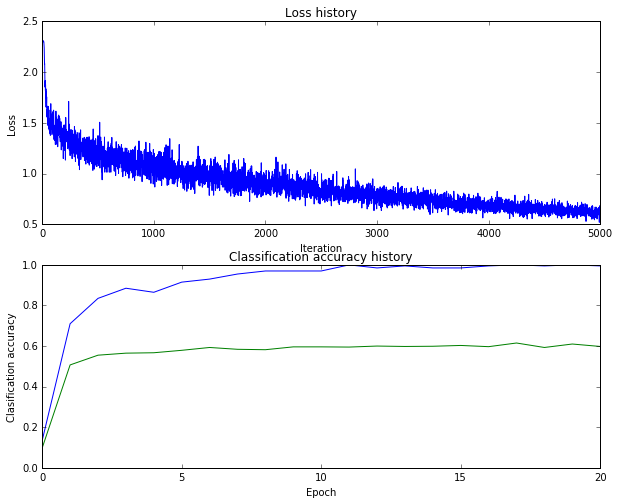

(1500.0, 1.0, 0.001)
iteration 0 / 5000: loss 2.302586
iteration 100 / 5000: loss 1.501634
iteration 200 / 5000: loss 1.411003
iteration 300 / 5000: loss 1.172669
iteration 400 / 5000: loss 1.101418
iteration 500 / 5000: loss 1.144670
iteration 600 / 5000: loss 1.178555
iteration 700 / 5000: loss 1.125971
iteration 800 / 5000: loss 1.133486
iteration 900 / 5000: loss 1.103107
iteration 1000 / 5000: loss 1.176322
iteration 1100 / 5000: loss 0.962110
iteration 1200 / 5000: loss 1.039675
iteration 1300 / 5000: loss 1.113053
iteration 1400 / 5000: loss 1.049889
iteration 1500 / 5000: loss 1.095749
iteration 1600 / 5000: loss 0.985369
iteration 1700 / 5000: loss 0.985635
iteration 1800 / 5000: loss 1.083874
iteration 1900 / 5000: loss 0.953227
iteration 2000 / 5000: loss 0.992191
iteration 2100 / 5000: loss 1.009849
iteration 2200 / 5000: loss 0.923307
iteration 2300 / 5000: loss 0.889022
iteration 2400 / 5000: loss 0.982598
iteration 2500 / 5000: loss 0.951145
iteration 2600 / 5000: loss 0

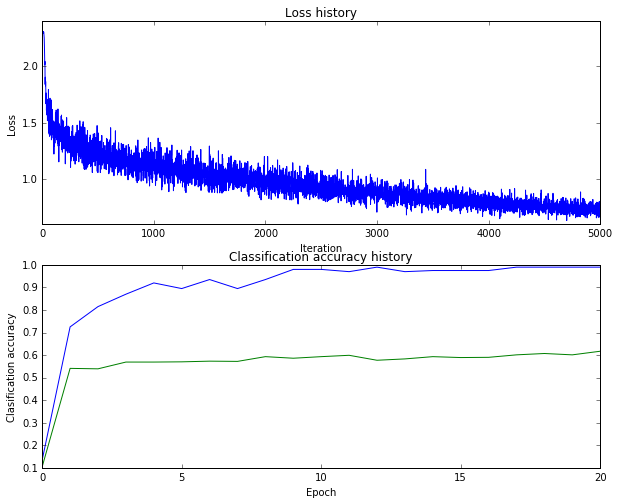

(1500.0, 1.0, 0.0015)
iteration 0 / 5000: loss 2.302587
iteration 100 / 5000: loss 1.728494
iteration 200 / 5000: loss 1.363169
iteration 300 / 5000: loss 1.444488
iteration 400 / 5000: loss 1.280022
iteration 500 / 5000: loss 1.143085
iteration 600 / 5000: loss 1.189349
iteration 700 / 5000: loss 1.365744
iteration 800 / 5000: loss 1.081166
iteration 900 / 5000: loss 1.106306
iteration 1000 / 5000: loss 1.269397
iteration 1100 / 5000: loss 1.252224
iteration 1200 / 5000: loss 1.094842
iteration 1300 / 5000: loss 1.128012
iteration 1400 / 5000: loss 1.060159
iteration 1500 / 5000: loss 1.141766
iteration 1600 / 5000: loss 1.054642
iteration 1700 / 5000: loss 1.280029
iteration 1800 / 5000: loss 1.094390
iteration 1900 / 5000: loss 1.178011
iteration 2000 / 5000: loss 1.097736
iteration 2100 / 5000: loss 1.145466
iteration 2200 / 5000: loss 1.114836
iteration 2300 / 5000: loss 1.056661
iteration 2400 / 5000: loss 1.110826
iteration 2500 / 5000: loss 0.940871
iteration 2600 / 5000: loss 

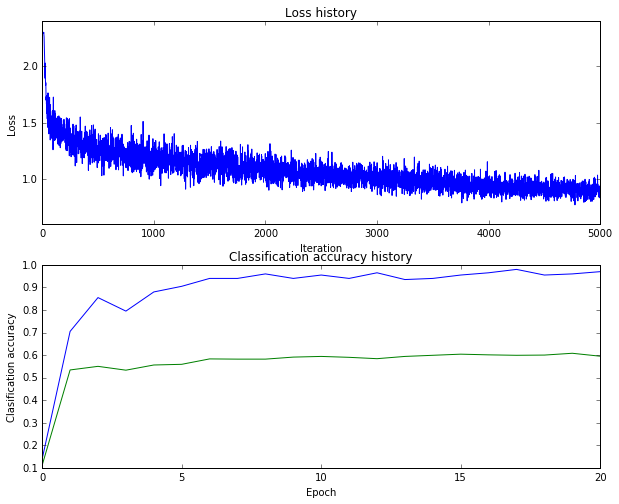

(1500.0, 1.5, 0.00075000000000000002)
iteration 0 / 5000: loss 2.302586
iteration 100 / 5000: loss 1.459165
iteration 200 / 5000: loss 1.362393
iteration 300 / 5000: loss 1.188153
iteration 400 / 5000: loss 1.324721
iteration 500 / 5000: loss 1.234841
iteration 600 / 5000: loss 1.080052
iteration 700 / 5000: loss 1.037547
iteration 800 / 5000: loss 1.219625
iteration 900 / 5000: loss 1.236264
iteration 1000 / 5000: loss 1.193674
iteration 1100 / 5000: loss 1.183653
iteration 1200 / 5000: loss 1.223283
iteration 1300 / 5000: loss 1.144882
iteration 1400 / 5000: loss 1.180773
iteration 1500 / 5000: loss 0.879245
iteration 1600 / 5000: loss 1.036196
iteration 1700 / 5000: loss 0.974639
iteration 1800 / 5000: loss 0.991742
iteration 1900 / 5000: loss 1.025355
iteration 2000 / 5000: loss 0.889313
iteration 2100 / 5000: loss 0.854368
iteration 2200 / 5000: loss 0.952023
iteration 2300 / 5000: loss 1.027415
iteration 2400 / 5000: loss 0.934239
iteration 2500 / 5000: loss 0.909909
iteration 26

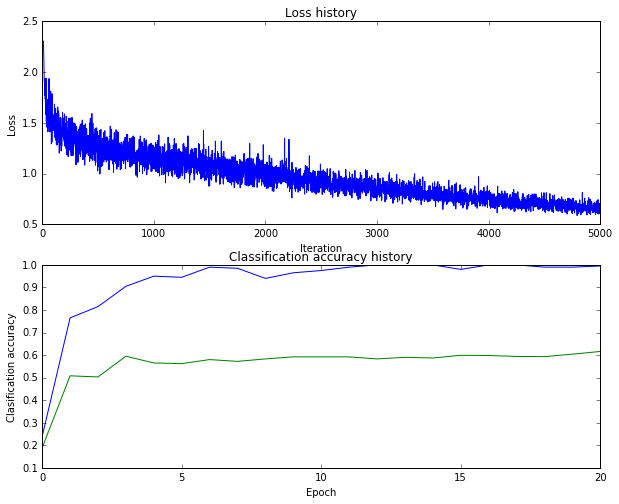

(1500.0, 1.5, 0.001)
iteration 0 / 5000: loss 2.302586
iteration 100 / 5000: loss 1.465507
iteration 200 / 5000: loss 1.342040
iteration 300 / 5000: loss 1.388920
iteration 400 / 5000: loss 1.391122
iteration 500 / 5000: loss 1.133315
iteration 600 / 5000: loss 1.239855
iteration 700 / 5000: loss 1.252787
iteration 800 / 5000: loss 1.168365
iteration 900 / 5000: loss 1.221929
iteration 1000 / 5000: loss 1.090829
iteration 1100 / 5000: loss 1.153587
iteration 1200 / 5000: loss 1.071066
iteration 1300 / 5000: loss 1.110660
iteration 1400 / 5000: loss 1.266625
iteration 1500 / 5000: loss 1.135322
iteration 1600 / 5000: loss 1.032159
iteration 1700 / 5000: loss 1.102996
iteration 1800 / 5000: loss 1.170485
iteration 1900 / 5000: loss 1.183747
iteration 2000 / 5000: loss 1.092306
iteration 2100 / 5000: loss 1.026577
iteration 2200 / 5000: loss 1.072447
iteration 2300 / 5000: loss 0.913684
iteration 2400 / 5000: loss 1.054439
iteration 2500 / 5000: loss 1.126356
iteration 2600 / 5000: loss 0

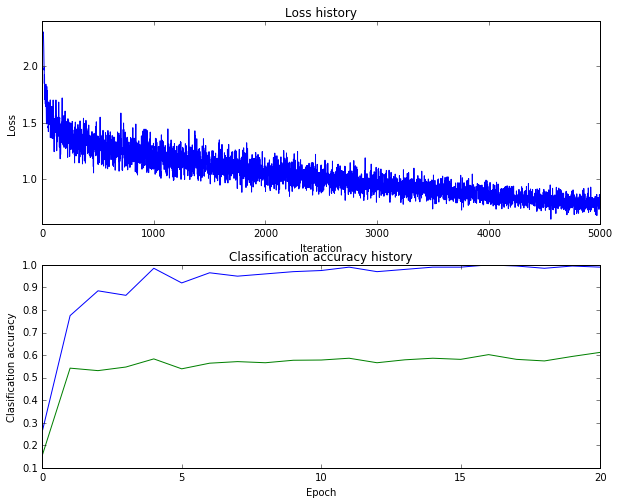

(1500.0, 1.5, 0.0015)
iteration 0 / 5000: loss 2.302587
iteration 100 / 5000: loss 1.495158
iteration 200 / 5000: loss 1.379787
iteration 300 / 5000: loss 1.328013
iteration 400 / 5000: loss 1.442350
iteration 500 / 5000: loss 1.308622
iteration 600 / 5000: loss 1.329121
iteration 700 / 5000: loss 1.236382
iteration 800 / 5000: loss 1.295312
iteration 900 / 5000: loss 1.250219
iteration 1000 / 5000: loss 1.316611
iteration 1100 / 5000: loss 1.220575
iteration 1200 / 5000: loss 1.284157
iteration 1300 / 5000: loss 1.228488
iteration 1400 / 5000: loss 1.231547
iteration 1500 / 5000: loss 1.294272
iteration 1600 / 5000: loss 1.378230
iteration 1700 / 5000: loss 1.197852
iteration 1800 / 5000: loss 1.162657
iteration 1900 / 5000: loss 1.259750
iteration 2000 / 5000: loss 1.226965
iteration 2100 / 5000: loss 1.168267
iteration 2200 / 5000: loss 1.154542
iteration 2300 / 5000: loss 1.262939
iteration 2400 / 5000: loss 1.122318
iteration 2500 / 5000: loss 1.199477
iteration 2600 / 5000: loss 

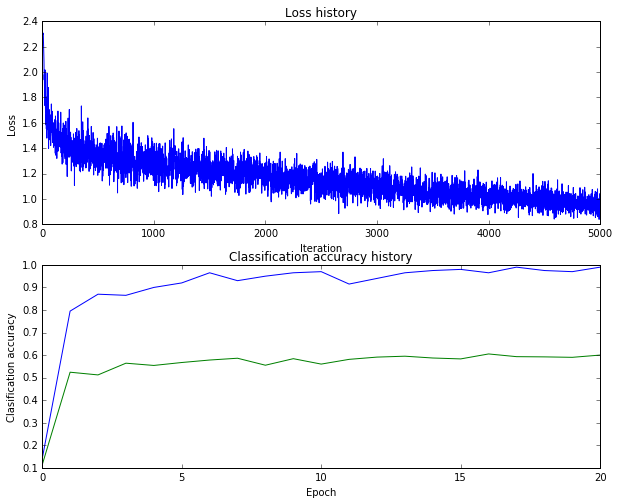

Best validation accuracy: 0.625 for h_size 1000.0, lr 0.75, reg 0.00075


In [61]:
input_dim = X_train_feats.shape[1]
#hidden_dim = 500
num_classes = 10

best_net = None

best_val = 0
best_hpset = None
results = {}

epochs = 5000
start_hpset = np.array([1000, 1, 1e-3])
range_set = np.array([0.75, 1, 1.5])
hs_set = range_set*start_hpset[0]
#hs_set = np.array([250, 270, 300])
lr_set = range_set*start_hpset[1]
#reg_set = np.array([.7, 1, 1.3])
reg_set = range_set*start_hpset[2]

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
for hidden_size in hs_set:
    for lr in lr_set:
        for reg in reg_set:
            hpset = (hidden_size, lr, reg)
            print hpset
            net = TwoLayerNet(input_dim, hidden_size, num_classes)

            # Train the network
            stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
                        num_iters=epochs, batch_size=200,
                        learning_rate=lr, learning_rate_decay=0.95,
                        reg=reg, verbose=True)
            
            train_acc = (net.predict(X_train_feats) == y_train).mean()
            # Predict on the validation set
            val_acc = (net.predict(X_val_feats) == y_val).mean()
            results[(hidden_size, lr, reg)] = (train_acc, val_acc)
            print 'Validation accuracy: ', val_acc

            plt.subplot(2, 1, 1)
            plt.plot(stats['loss_history'])
            plt.title('Loss history')
            plt.xlabel('Iteration')
            plt.ylabel('Loss')

            plt.subplot(2, 1, 2)
            plt.plot(stats['train_acc_history'], label='train')
            plt.plot(stats['val_acc_history'], label='val')
            plt.title('Classification accuracy history')
            plt.xlabel('Epoch')
            plt.ylabel('Clasification accuracy')
            plt.show()
            
            print('===============================================')

            if val_acc > best_val:
                best_val = val_acc
                best_hpset = hpset
                best_net = net

print 'Best validation accuracy: {} for h_size {}, lr {}, reg {}'.format(
            best_val, best_hpset[0], best_hpset[1], best_hpset[2])
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

In [62]:
# Print out results.
for hs, lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(hs, lr, reg)]
    print 'lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy)
    
print 'best validation accuracy achieved during cross-validation: %f' % best_val

lr 7.500000e-01 reg 7.500000e-04 train accuracy: 0.891265 val accuracy: 0.599000
lr 7.500000e-01 reg 1.000000e-03 train accuracy: 0.870122 val accuracy: 0.597000
lr 7.500000e-01 reg 1.500000e-03 train accuracy: 0.823735 val accuracy: 0.611000
lr 1.000000e+00 reg 7.500000e-04 train accuracy: 0.900306 val accuracy: 0.594000
lr 1.000000e+00 reg 1.000000e-03 train accuracy: 0.875837 val accuracy: 0.602000
lr 1.000000e+00 reg 1.500000e-03 train accuracy: 0.823571 val accuracy: 0.596000
lr 1.500000e+00 reg 7.500000e-04 train accuracy: 0.895898 val accuracy: 0.578000
lr 1.500000e+00 reg 1.000000e-03 train accuracy: 0.867143 val accuracy: 0.589000
lr 1.500000e+00 reg 1.500000e-03 train accuracy: 0.811673 val accuracy: 0.609000
lr 7.500000e-01 reg 7.500000e-04 train accuracy: 0.911000 val accuracy: 0.625000
lr 7.500000e-01 reg 1.000000e-03 train accuracy: 0.877449 val accuracy: 0.591000
lr 7.500000e-01 reg 1.500000e-03 train accuracy: 0.836163 val accuracy: 0.613000
lr 1.000000e+00 reg 7.500000

In [63]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (net.predict(X_test_feats) == y_test).mean()
print test_acc

0.584


# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!